<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-9 - Wait-Attention (Flat-Trend) - Gold - LSTM </h1> </html>

## Gold  - Period: 01/01/2024 - 30/06/2024
5-minutes time-frame
     
### Predictions of Flat-Trend
- Early-Stopping
- Loss function: BinaryCrossentropy
- Metrics: Accuracy and (F1, Precision, Recall)

### length of analysed history (sliding window)- 50 raws ago

#### dataset: 35232 rows (5-minutes)
#### use part of the dataset: 12000 rows, which is around 2 months
#### train / test = 90 /10

#### Parameters

epoch = 30

patience = 10

take-profit = $10

hours = 4

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [1]:
# For Google Colab only!

!cat /proc/driver/nvidia/gpus/0000:00:04.0/information

Model: 		 Unknown
IRQ:   		 11
GPU UUID: 	 GPU-ebdc0827-eb4c-9cad-9884-fce9f785c7ba
Video BIOS: 	 90.04.a7.00.01
Bus Type: 	 PCI
DMA Size: 	 47 bits
DMA Mask: 	 0x7fffffffffff
Bus Location: 	 0000:00:04.0
Device Minor: 	 0
GPU Excluded:	 No


### Hint:

You can copy many blocks of text in the cells from the previous 2 weeks of practice sessions.
Some are easy enough to copy, some need to be slightly modified. In any case, this can speed up your code creation.

______________________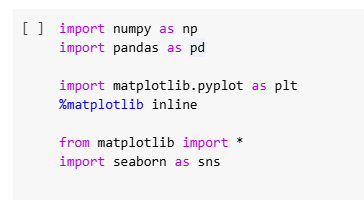

In [2]:
#import numpy,pandas,matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import *
import seaborn as sns

In [ ]:
#

_______________________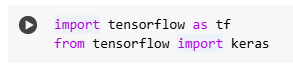

In [3]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
#

______________________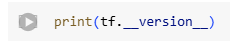

In [4]:
print(tf.__version__)

2.18.0


In [ ]:
#

2.18.0


______________________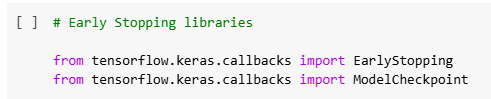

In [5]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
#

________________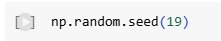

In [6]:
np.random.seed(19)

In [ ]:
#

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [8]:
# Use code in this cell for Google Colab only

# Run the cell twice and upload 2 files:
# XAUUSD_5 Mins_Ask_2024.01.01_2024.06.30.csv
# XAUUSD_5 Mins_Bid_2024.01.01_2024.06.30.csv

from google.colab import files
uploaded = files.upload()

Saving XAUUSD_5 Mins_Bid_2024.01.01_2024.06.30.csv to XAUUSD_5 Mins_Bid_2024.01.01_2024.06.30.csv


_________________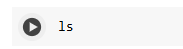

In [9]:
ls

 sample_data/                                  'XAUUSD_5 Mins_Bid_2024.01.01_2024.06.30.csv'
'XAUUSD_5 Mins_Ask_2024.01.01_2024.06.30.csv'


In [ ]:
# Here, you should see the 2 files mentioned above.

 sample_data/                                   XAUUSD_Daily_Ask_2024.01.01_2024.06.30.csv
'XAUUSD_5 Mins_Ask_2024.01.01_2024.06.30.csv'   XAUUSD_Hourly_Ask_2024.01.01_2024.06.30.csv
'XAUUSD_5 Mins_Bid_2024.01.01_2024.06.30.csv'


___________________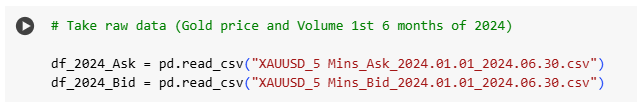

In [10]:
df_2024_Ask = pd.read_csv("XAUUSD_5 Mins_Bid_2024.01.01_2024.06.30.csv")
df_2024_Bid = pd.read_csv("XAUUSD_5 Mins_Ask_2024.01.01_2024.06.30.csv")

In [ ]:
#

______________________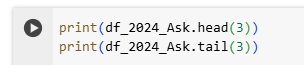

In [11]:
print(df_2024_Ask.head(3))
print(df_2024_Ask.tail(3))

            Time (UTC)      Open      High       Low     Close  Volume 
0  2024.01.01 23:00:00  2062.598  2066.595  2062.405  2065.214  0.12012
1  2024.01.01 23:05:00  2065.185  2065.194  2063.851  2064.455  0.06508
2  2024.01.01 23:10:00  2064.424  2066.365  2064.395  2065.734  0.03945
                Time (UTC)      Open      High       Low     Close  Volume 
35229  2024.06.30 23:45:00  2325.645  2325.905  2325.465  2325.525  0.06891
35230  2024.06.30 23:50:00  2325.515  2325.525  2325.125  2325.385  0.09813
35231  2024.06.30 23:55:00  2325.438  2325.438  2324.625  2324.825  0.07851


In [ ]:
#

            Time (UTC)      Open      High       Low     Close  Volume 
0  2024.01.01 23:00:00  2064.562  2067.475  2064.075  2065.686  0.11843
1  2024.01.01 23:05:00  2065.616  2065.839  2064.476  2064.902  0.06906
2  2024.01.01 23:10:00  2064.902  2066.825  2064.752  2066.105  0.04203
                Time (UTC)      Open      High       Low     Close  Volume 
35229  2024.06.30 23:45:00  2326.026  2326.315  2325.875  2325.945  0.02538
35230  2024.06.30 23:50:00  2325.945  2325.945  2325.555  2325.795  0.02880
35231  2024.06.30 23:55:00  2325.825  2325.835  2325.066  2325.245  0.07257


________________________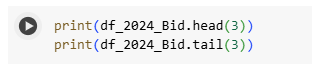

In [12]:
print(df_2024_Bid.head(3))
print(df_2024_Bid.tail(3))

            Time (UTC)      Open      High       Low     Close  Volume 
0  2024.01.01 23:00:00  2064.562  2067.475  2064.075  2065.686  0.11843
1  2024.01.01 23:05:00  2065.616  2065.839  2064.476  2064.902  0.06906
2  2024.01.01 23:10:00  2064.902  2066.825  2064.752  2066.105  0.04203
                Time (UTC)      Open      High       Low     Close  Volume 
35229  2024.06.30 23:45:00  2326.026  2326.315  2325.875  2325.945  0.02538
35230  2024.06.30 23:50:00  2325.945  2325.945  2325.555  2325.795  0.02880
35231  2024.06.30 23:55:00  2325.825  2325.835  2325.066  2325.245  0.07257


In [ ]:
#

            Time (UTC)      Open      High       Low     Close  Volume 
0  2024.01.01 23:00:00  2062.598  2066.595  2062.405  2065.214  0.12012
1  2024.01.01 23:05:00  2065.185  2065.194  2063.851  2064.455  0.06508
2  2024.01.01 23:10:00  2064.424  2066.365  2064.395  2065.734  0.03945
                Time (UTC)      Open      High       Low     Close  Volume 
35229  2024.06.30 23:45:00  2325.645  2325.905  2325.465  2325.525  0.06891
35230  2024.06.30 23:50:00  2325.515  2325.525  2325.125  2325.385  0.09813
35231  2024.06.30 23:55:00  2325.438  2325.438  2324.625  2324.825  0.07851


<html> <h3 style="font-style:italic; color:blue;"> Merge DataFrame </h3> </html>

___________________________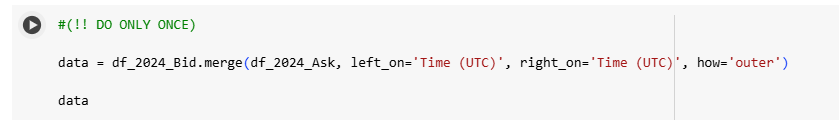

In [13]:
data =df_2024_Bid.merge(df_2024_Ask, left_on='Time (UTC)', right_on ='Time (UTC)', how='outer')
data

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2024.01.01 23:00:00,2064.562,2067.475,2064.075,2065.686,0.11843,2062.598,2066.595,2062.405,2065.214,0.12012
1,2024.01.01 23:05:00,2065.616,2065.839,2064.476,2064.902,0.06906,2065.185,2065.194,2063.851,2064.455,0.06508
2,2024.01.01 23:10:00,2064.902,2066.825,2064.752,2066.105,0.04203,2064.424,2066.365,2064.395,2065.734,0.03945
3,2024.01.01 23:15:00,2066.105,2066.525,2065.415,2065.986,0.03201,2065.715,2066.075,2065.055,2065.585,0.04386
4,2024.01.01 23:20:00,2065.992,2066.242,2065.645,2065.855,0.03309,2065.585,2065.815,2065.295,2065.555,0.03171
...,...,...,...,...,...,...,...,...,...,...,...
35227,2024.06.30 23:35:00,2325.425,2326.455,2325.345,2326.065,0.07116,2325.005,2326.035,2324.905,2325.625,0.07389
35228,2024.06.30 23:40:00,2326.045,2326.202,2325.595,2325.965,0.04635,2325.625,2325.755,2325.165,2325.575,0.06771
35229,2024.06.30 23:45:00,2326.026,2326.315,2325.875,2325.945,0.02538,2325.645,2325.905,2325.465,2325.525,0.06891
35230,2024.06.30 23:50:00,2325.945,2325.945,2325.555,2325.795,0.02880,2325.515,2325.525,2325.125,2325.385,0.09813


In [ ]:
#

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2024.01.01 23:00:00,2062.598,2066.595,2062.405,2065.214,0.12012,2064.562,2067.475,2064.075,2065.686,0.11843
1,2024.01.01 23:05:00,2065.185,2065.194,2063.851,2064.455,0.06508,2065.616,2065.839,2064.476,2064.902,0.06906
2,2024.01.01 23:10:00,2064.424,2066.365,2064.395,2065.734,0.03945,2064.902,2066.825,2064.752,2066.105,0.04203
3,2024.01.01 23:15:00,2065.715,2066.075,2065.055,2065.585,0.04386,2066.105,2066.525,2065.415,2065.986,0.03201
4,2024.01.01 23:20:00,2065.585,2065.815,2065.295,2065.555,0.03171,2065.992,2066.242,2065.645,2065.855,0.03309
...,...,...,...,...,...,...,...,...,...,...,...
35227,2024.06.30 23:35:00,2325.005,2326.035,2324.905,2325.625,0.07389,2325.425,2326.455,2325.345,2326.065,0.07116
35228,2024.06.30 23:40:00,2325.625,2325.755,2325.165,2325.575,0.06771,2326.045,2326.202,2325.595,2325.965,0.04635
35229,2024.06.30 23:45:00,2325.645,2325.905,2325.465,2325.525,0.06891,2326.026,2326.315,2325.875,2325.945,0.02538
35230,2024.06.30 23:50:00,2325.515,2325.525,2325.125,2325.385,0.09813,2325.945,2325.945,2325.555,2325.795,0.02880


________________________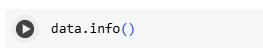

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35232 entries, 0 to 35231
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35232 non-null  object 
 1   Open_x      35232 non-null  float64
 2   High_x      35232 non-null  float64
 3   Low_x       35232 non-null  float64
 4   Close_x     35232 non-null  float64
 5   Volume _x   35232 non-null  float64
 6   Open_y      35232 non-null  float64
 7   High_y      35232 non-null  float64
 8   Low_y       35232 non-null  float64
 9   Close_y     35232 non-null  float64
 10  Volume _y   35232 non-null  float64
dtypes: float64(10), object(1)
memory usage: 3.0+ MB


In [ ]:
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35232 entries, 0 to 35231
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35232 non-null  object 
 1   Open_x      35232 non-null  float64
 2   High_x      35232 non-null  float64
 3   Low_x       35232 non-null  float64
 4   Close_x     35232 non-null  float64
 5   Volume _x   35232 non-null  float64
 6   Open_y      35232 non-null  float64
 7   High_y      35232 non-null  float64
 8   Low_y       35232 non-null  float64
 9   Close_y     35232 non-null  float64
 10  Volume _y   35232 non-null  float64
dtypes: float64(10), object(1)
memory usage: 3.0+ MB


In [ ]:
# No NaN elements !

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [15]:
# rename columns

data.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

_______________________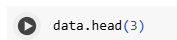

In [16]:
data.head(3)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,2024.01.01 23:00:00,2064.562,2067.475,2064.075,2065.686,0.11843,2062.598,2066.595,2062.405,2065.214,0.12012
1,2024.01.01 23:05:00,2065.616,2065.839,2064.476,2064.902,0.06906,2065.185,2065.194,2063.851,2064.455,0.06508
2,2024.01.01 23:10:00,2064.902,2066.825,2064.752,2066.105,0.04203,2064.424,2066.365,2064.395,2065.734,0.03945


In [ ]:
#

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,2024.01.01 23:00:00,2062.598,2066.595,2062.405,2065.214,0.12012,2064.562,2067.475,2064.075,2065.686,0.11843
1,2024.01.01 23:05:00,2065.185,2065.194,2063.851,2064.455,0.06508,2065.616,2065.839,2064.476,2064.902,0.06906
2,2024.01.01 23:10:00,2064.424,2066.365,2064.395,2065.734,0.03945,2064.902,2066.825,2064.752,2066.105,0.04203


__________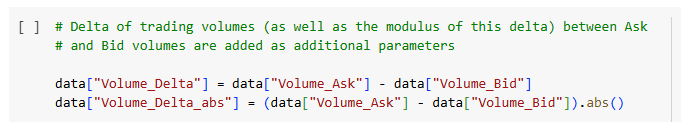

In [17]:
data["Volume_Delta"] = data["Volume_Ask"] - data["Volume_Bid"]
data["Volume_Delta"] = (data["Volume_Ask"] - data["Volume_Bid"]).abs()

In [ ]:
#

_______________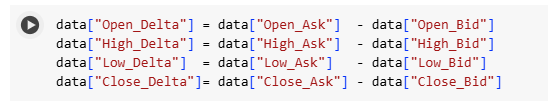

In [18]:
data["Open_Delta"] = data["Open_Ask"] - data["Open_Bid"]
data["High_Delta"] = data["High_Ask"] - data["High_Bid"]
data["Low_Delta"] = data["Low_Ask"] - data["Low_Bid"]
data["Close_Delta"] = data["Close_Ask"] - data["Close_Bid"]

In [ ]:
#

____________________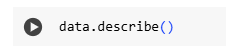

In [19]:
data.describe()


,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Open_Delta,High_Delta,Low_Delta,Close_Delta
count,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000
mean,2206.249356,2207.005264,2205.487844,2206.256846,0.152062,2205.889710,2206.645921,2205.128739,2205.897065,0.152156,0.085480,-0.359646,-0.359343,-0.359105,-0.359781
std,143.005802,143.192352,142.808660,143.005909,0.156439,142.978742,143.165839,142.780793,142.978152,0.159003,0.098443,0.105919,0.085914,0.090534,0.086697
min,1985.915000,1986.945000,1984.475000,1985.915000,0.000000,1985.635000,1986.595000,1984.088000,1985.625000,0.000000,0.000000,-5.981000,-5.981000,-5.981000,-5.981000
25%,2036.195000,2036.675000,2035.722000,2036.195000,0.049140,2035.855000,2036.333250,2035.385000,2035.855000,0.046255,0.017700,-0.387000,-0.387000,-0.387000,-0.387000
50%,2255.650000,2256.758500,2254.608500,2255.660000,0.101700,2255.281500,2256.425000,2254.270000,2255.301500,0.098350,0.052920,-0.350000,-0.350000,-0.350000,-0.350000
75%,2333.878250,2334.685250,2333.005000,2333.886750,0.196412,2333.475000,2334.292250,2332.639750,2333.477500,0.199250,0.118320,-0.317000,-0.320000,-0.320000,-0.320000
max,2450.185000,2450.325000,2447.966000,2450.165000,2.842680,2449.735000,2449.985000,2447.555000,2449.758000,1.485490,2.703590,-0.001000,-0.042000,-0.001000,-0.075000


In [ ]:
#

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
count,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000
mean,2205.889710,2206.645921,2205.128739,2205.897065,0.152156,2206.249356,2207.005264,2205.487844,2206.256846,0.152062,-0.000094,0.085480,0.359646,0.359343,0.359105,0.359781
std,142.978742,143.165839,142.780793,142.978152,0.159003,143.005802,143.192352,142.808660,143.005909,0.156439,0.130376,0.098443,0.105919,0.085914,0.090534,0.086697
min,1985.635000,1986.595000,1984.088000,1985.625000,0.000000,1985.915000,1986.945000,1984.475000,1985.915000,0.000000,-1.064400,0.000000,0.001000,0.042000,0.001000,0.075000
25%,2035.855000,2036.333250,2035.385000,2035.855000,0.046255,2036.195000,2036.675000,2035.722000,2036.195000,0.049140,-0.051012,0.017700,0.317000,0.320000,0.320000,0.320000
50%,2255.281500,2256.425000,2254.270000,2255.301500,0.098350,2255.650000,2256.758500,2254.608500,2255.660000,0.101700,0.001105,0.052920,0.350000,0.350000,0.350000,0.350000
75%,2333.475000,2334.292250,2332.639750,2333.477500,0.199250,2333.878250,2334.685250,2333.005000,2333.886750,0.196412,0.054670,0.118320,0.387000,0.387000,0.387000,0.387000
max,2449.735000,2449.985000,2447.555000,2449.758000,1.485490,2450.185000,2450.325000,2447.966000,2450.165000,2.842680,2.703590,2.703590,5.981000,5.981000,5.981000,5.981000


_______________________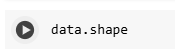

In [20]:
data.shape

(35232, 16)

In [ ]:
#

(35232, 17)

_________________________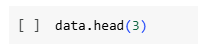

In [21]:
data.head(3)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Open_Delta,High_Delta,Low_Delta,Close_Delta
0,2024.01.01 23:00:00,2064.562,2067.475,2064.075,2065.686,0.11843,2062.598,2066.595,2062.405,2065.214,0.12012,0.00169,-1.964,-0.880,-1.670,-0.472
1,2024.01.01 23:05:00,2065.616,2065.839,2064.476,2064.902,0.06906,2065.185,2065.194,2063.851,2064.455,0.06508,0.00398,-0.431,-0.645,-0.625,-0.447
2,2024.01.01 23:10:00,2064.902,2066.825,2064.752,2066.105,0.04203,2064.424,2066.365,2064.395,2065.734,0.03945,0.00258,-0.478,-0.460,-0.357,-0.371


In [ ]:
#

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
0,2024.01.01 23:00:00,2062.598,2066.595,2062.405,2065.214,0.12012,2064.562,2067.475,2064.075,2065.686,0.11843,-0.00169,0.00169,1.964,0.880,1.670,0.472
1,2024.01.01 23:05:00,2065.185,2065.194,2063.851,2064.455,0.06508,2065.616,2065.839,2064.476,2064.902,0.06906,0.00398,0.00398,0.431,0.645,0.625,0.447
2,2024.01.01 23:10:00,2064.424,2066.365,2064.395,2065.734,0.03945,2064.902,2066.825,2064.752,2066.105,0.04203,0.00258,0.00258,0.478,0.460,0.357,0.371


<html> <h3 style="font-style:italic; color:blue;"> Date transformation </h3> </html>

______________________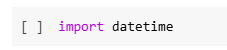

In [22]:
import datetime

In [ ]:
#

_________________________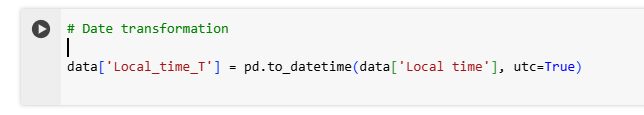

In [23]:
data['Local_time_T'] = pd.to_datetime(data['Local time'], utc=True)

In [ ]:
#

________________________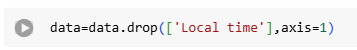

In [24]:
data=data.drop(['Local time'],axis=1)

In [ ]:
#

_______________________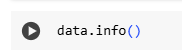

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35232 entries, 0 to 35231
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Open_Bid      35232 non-null  float64            
 1   High_Bid      35232 non-null  float64            
 2   Low_Bid       35232 non-null  float64            
 3   Close_Bid     35232 non-null  float64            
 4   Volume_Bid    35232 non-null  float64            
 5   Open_Ask      35232 non-null  float64            
 6   High_Ask      35232 non-null  float64            
 7   Low_Ask       35232 non-null  float64            
 8   Close_Ask     35232 non-null  float64            
 9   Volume_Ask    35232 non-null  float64            
 10  Volume_Delta  35232 non-null  float64            
 11  Open_Delta    35232 non-null  float64            
 12  High_Delta    35232 non-null  float64            
 13  Low_Delta     35232 non-null  float64            
 14  Close_

In [ ]:
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35232 entries, 0 to 35231
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Open_Bid          35232 non-null  float64            
 1   High_Bid          35232 non-null  float64            
 2   Low_Bid           35232 non-null  float64            
 3   Close_Bid         35232 non-null  float64            
 4   Volume_Bid        35232 non-null  float64            
 5   Open_Ask          35232 non-null  float64            
 6   High_Ask          35232 non-null  float64            
 7   Low_Ask           35232 non-null  float64            
 8   Close_Ask         35232 non-null  float64            
 9   Volume_Ask        35232 non-null  float64            
 10  Volume_Delta      35232 non-null  float64            
 11  Volume_Delta_abs  35232 non-null  float64            
 12  Open_Delta        35232 non-null  float64            
 13  H

<html> <h3 style="font-style:italic; color:blue;"> Data Visualisation </h3> </html>

<html> <h4 style="font-style:italic; color:blue;"> Just run the next 3 cells using 'Ctrl' + 'Enter' </h4> </html>

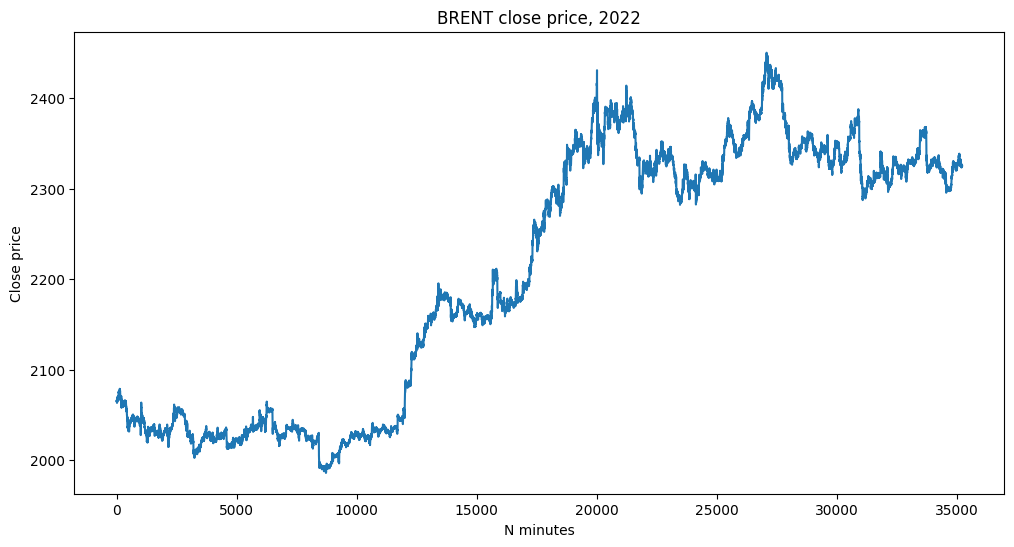

In [26]:
plt.figure(figsize=(12,6))
plt.plot(data['Close_Bid'])
plt.title('BRENT close price, 2022')
plt.xlabel('N minutes')
plt.ylabel('Close price')
plt.show()

<Figure size 900x400 with 0 Axes>

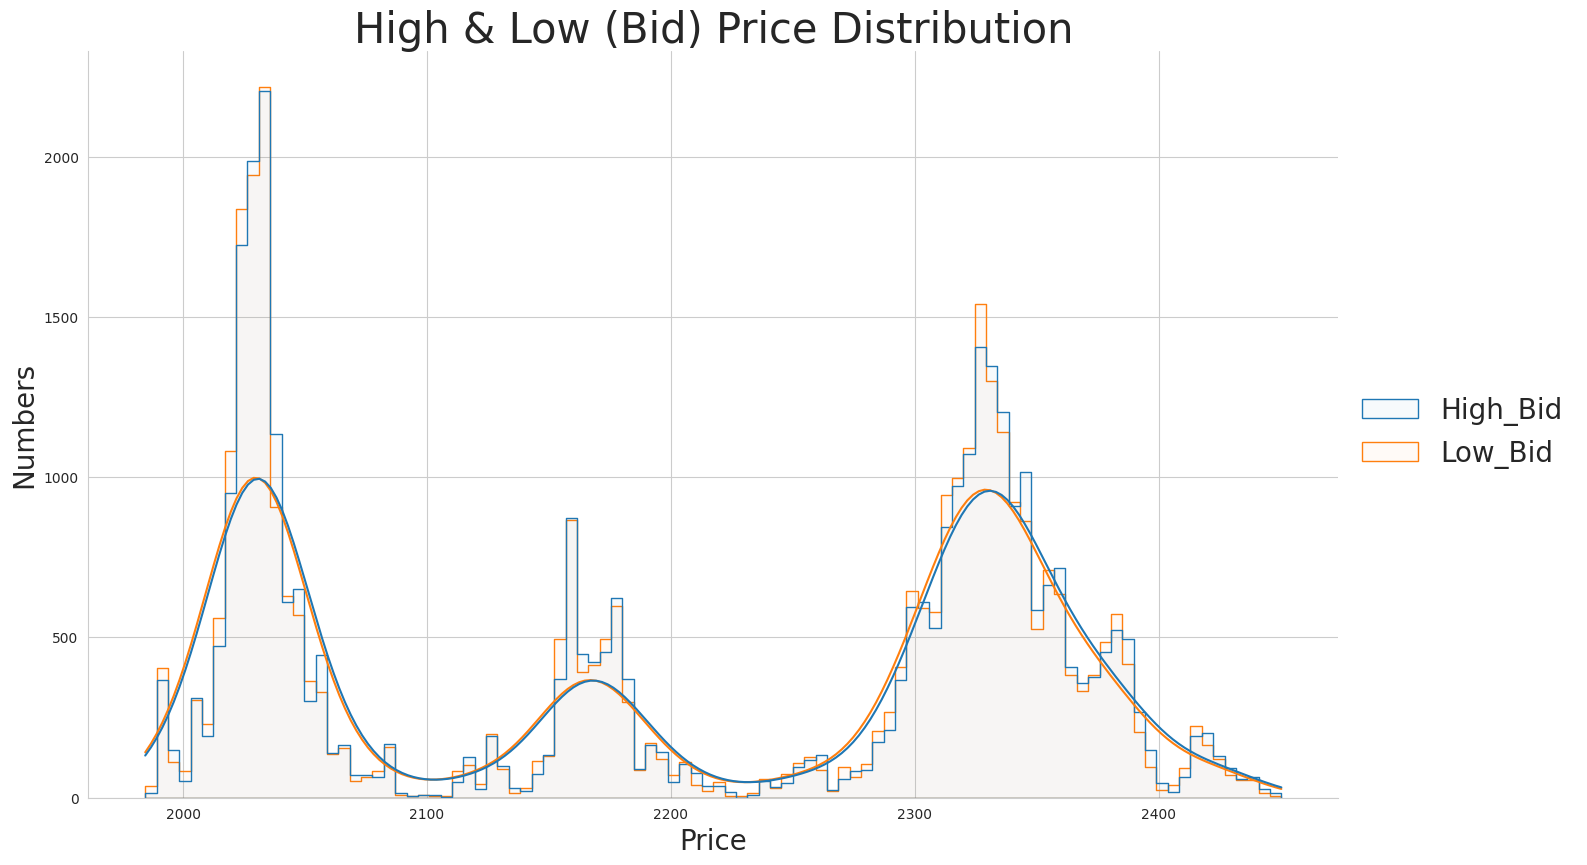

In [27]:
fig = plt.figure(figsize=(9, 4))
plt.rc('axes', titlesize= 30 )
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0})

sns.displot(
            data[['High_Bid', 'Low_Bid']],
            height=8,
            aspect=1.7,
            #hue="species",
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,

)

plt.title('High & Low (Bid) Price Distribution')
plt.xlabel('Price', size= 20)
#plt.ylabel('count (%)')
plt.ylabel('Numbers', size= 20)
plt.show();

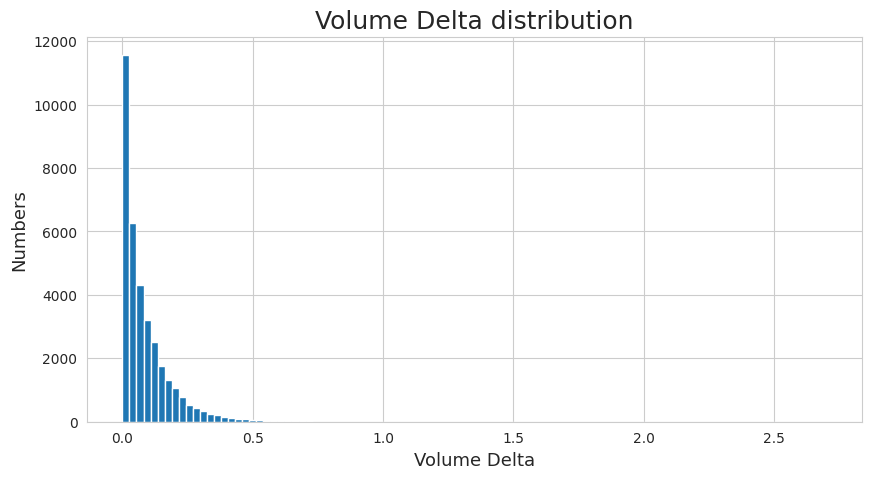

In [28]:
plt.figure(num=1,figsize=(10,5))
plt.hist(data['Volume_Delta'],bins=100)
plt.title('Volume Delta distribution',size=18)
plt.ylabel('Numbers',size=13)
plt.xlabel('Volume Delta',size=13)
plt.show();

In [ ]:
# Distribution has mostly positive values
# So Volume_Ask is usually greater than Volume_Bid,
# This corresponds to the upward trend in the first 6 months of 2024

<html> <h3 style="font-style:italic; color:blue;"> Indicate starts of days and weeks </h3> </html>

_______________________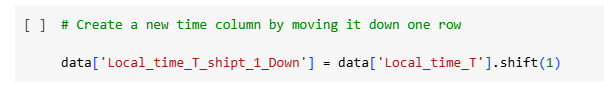

In [29]:
data['Local_time_T_shipt_1_Down'] = data['Local_time_T'].shift(1)

In [ ]:
#

______________________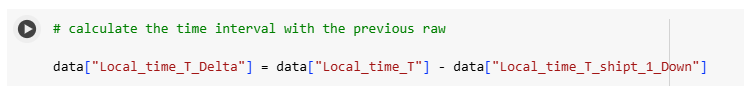

In [30]:
data["Local_time_T_Delta"] = data["Local_time_T"] - data["Local_time_T_shipt_1_Down"]

In [ ]:
#

________________________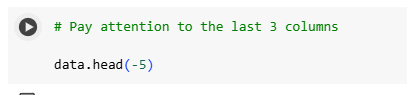

In [31]:
data.head(-5)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T,Local_time_T_shipt_1_Down,Local_time_T_Delta
0,2064.562,2067.475,2064.075,2065.686,0.11843,2062.598,2066.595,2062.405,2065.214,0.12012,0.00169,-1.964,-0.880,-1.670,-0.472,2024-01-01 23:00:00+00:00,NaT,NaT
1,2065.616,2065.839,2064.476,2064.902,0.06906,2065.185,2065.194,2063.851,2064.455,0.06508,0.00398,-0.431,-0.645,-0.625,-0.447,2024-01-01 23:05:00+00:00,2024-01-01 23:00:00+00:00,0 days 00:05:00
2,2064.902,2066.825,2064.752,2066.105,0.04203,2064.424,2066.365,2064.395,2065.734,0.03945,0.00258,-0.478,-0.460,-0.357,-0.371,2024-01-01 23:10:00+00:00,2024-01-01 23:05:00+00:00,0 days 00:05:00
3,2066.105,2066.525,2065.415,2065.986,0.03201,2065.715,2066.075,2065.055,2065.585,0.04386,0.01185,-0.390,-0.450,-0.360,-0.401,2024-01-01 23:15:00+00:00,2024-01-01 23:10:00+00:00,0 days 00:05:00
4,2065.992,2066.242,2065.645,2065.855,0.03309,2065.585,2065.815,2065.295,2065.555,0.03171,0.00138,-0.407,-0.427,-0.350,-0.300,2024-01-01 23:20:00+00:00,2024-01-01 23:15:00+00:00,0 days 00:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35222,2324.635,2325.865,2324.635,2325.835,0.05331,2324.145,2325.445,2324.145,2325.395,0.04935,0.00396,-0.490,-0.420,-0.490,-0.440,2024-06-30 23:10:00+00:00,2024-06-30 23:05:00+00:00,0 days 00:05:00
35223,2325.815,2325.905,2325.355,2325.425,0.02031,2325.395,2325.465,2324.955,2325.005,0.04422,0.02391,-0.420,-0.440,-0.400,-0.420,2024-06-30 23:15:00+00:00,2024-06-30 23:10:00+00:00,0 days 00:05:00
35224,2325.355,2325.525,2325.095,2325.415,0.01059,2324.945,2325.135,2324.655,2325.005,0.01317,0.00258,-0.410,-0.390,-0.440,-0.410,2024-06-30 23:20:00+00:00,2024-06-30 23:15:00+00:00,0 days 00:05:00
35225,2325.385,2325.525,2325.245,2325.475,0.00846,2324.975,2325.115,2324.835,2325.055,0.01080,0.00234,-0.410,-0.410,-0.410,-0.420,2024-06-30 23:25:00+00:00,2024-06-30 23:20:00+00:00,0 days 00:05:00


In [ ]:
#

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T,Local_time_T_shipt_1_Down,Local_time_T_Delta
0,2062.598,2066.595,2062.405,2065.214,0.12012,2064.562,2067.475,2064.075,2065.686,0.11843,-0.00169,0.00169,1.964,0.880,1.670,0.472,2024-01-01 23:00:00+00:00,NaT,NaT
1,2065.185,2065.194,2063.851,2064.455,0.06508,2065.616,2065.839,2064.476,2064.902,0.06906,0.00398,0.00398,0.431,0.645,0.625,0.447,2024-01-01 23:05:00+00:00,2024-01-01 23:00:00+00:00,0 days 00:05:00
2,2064.424,2066.365,2064.395,2065.734,0.03945,2064.902,2066.825,2064.752,2066.105,0.04203,0.00258,0.00258,0.478,0.460,0.357,0.371,2024-01-01 23:10:00+00:00,2024-01-01 23:05:00+00:00,0 days 00:05:00
3,2065.715,2066.075,2065.055,2065.585,0.04386,2066.105,2066.525,2065.415,2065.986,0.03201,-0.01185,0.01185,0.390,0.450,0.360,0.401,2024-01-01 23:15:00+00:00,2024-01-01 23:10:00+00:00,0 days 00:05:00
4,2065.585,2065.815,2065.295,2065.555,0.03171,2065.992,2066.242,2065.645,2065.855,0.03309,0.00138,0.00138,0.407,0.427,0.350,0.300,2024-01-01 23:20:00+00:00,2024-01-01 23:15:00+00:00,0 days 00:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35222,2324.145,2325.445,2324.145,2325.395,0.04935,2324.635,2325.865,2324.635,2325.835,0.05331,0.00396,0.00396,0.490,0.420,0.490,0.440,2024-06-30 23:10:00+00:00,2024-06-30 23:05:00+00:00,0 days 00:05:00
35223,2325.395,2325.465,2324.955,2325.005,0.04422,2325.815,2325.905,2325.355,2325.425,0.02031,-0.02391,0.02391,0.420,0.440,0.400,0.420,2024-06-30 23:15:00+00:00,2024-06-30 23:10:00+00:00,0 days 00:05:00
35224,2324.945,2325.135,2324.655,2325.005,0.01317,2325.355,2325.525,2325.095,2325.415,0.01059,-0.00258,0.00258,0.410,0.390,0.440,0.410,2024-06-30 23:20:00+00:00,2024-06-30 23:15:00+00:00,0 days 00:05:00
35225,2324.975,2325.115,2324.835,2325.055,0.01080,2325.385,2325.525,2325.245,2325.475,0.00846,-0.00234,0.00234,0.410,0.410,0.410,0.420,2024-06-30 23:25:00+00:00,2024-06-30 23:20:00+00:00,0 days 00:05:00


<html> <h4 style="font-style:italic; color:blue;"> Just run the next 2 cells using 'Ctrl' + 'Enter' </h4>








In [32]:
# The start of the year is the start of a week
# Therefore, we change the time interval to 2 days (the duration of the weekend).

data['Local_time_T_Delta'].iloc[0] = "2 days 01:01:00"
data['Local_time_T_Delta'].iloc[0]

<ipython-input-32-91f92eadbf3b>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Local_time_T_Delta'].iloc[0] = "2 days 01:01:00"
<ipython-input-32-91f92eadbf3b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

Timedelta('2 days 01:01:00')

In [33]:
# find intervals which are longer than 5 minutes
# create a new DataFrame with the beginning of the new days

new_day = data[['Local_time_T_Delta']][data["Local_time_T_Delta"] > '0 days 00:05:00']
new_day['Local_time_T_Delta'].value_counts(sort=False)

,count
Local_time_T_Delta,
2 days 01:01:00,1
0 days 01:05:00,98
2 days 01:05:00,24
0 days 03:35:00,4
2 days 00:05:00,1
3 days 01:05:00,1


In [ ]:
# We found the duration of night intervals when there is no trading in Gold.
# Total such intervals - 129, which is equal to the number of trading days during 6 first months of 2024

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [34]:
# find intervals which are longer than 1 day
# create a new DataFrame with the beginning of the new weeks

new_week = data[['Local_time_T_Delta']][data['Local_time_T_Delta'] > '1 days 00:00:00']
new_week["Local_time_T_Delta"].value_counts(sort=False)

,count
Local_time_T_Delta,
2 days 01:01:00,1
2 days 01:05:00,24
2 days 00:05:00,1
3 days 01:05:00,1


In [ ]:
# We found the weekend duration when there is no trading in Gold.
# Total such intervals - 27, which is equal to the number of weekends during 6 first months of 2024

____________________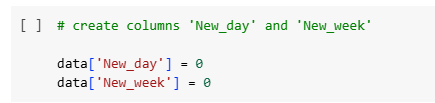

In [35]:
data['New_day'] = 0
data['New_week'] = 0

In [ ]:
#

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [36]:
# Fill in "1" when the new day starts

data.loc[data["Local_time_T_Delta"] > '0 days 00:05:00', 'New_day'] = 1

__________________________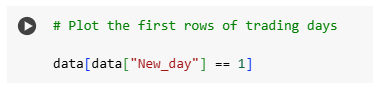

In [37]:
data[data["New_day"] == 1 ]

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T,Local_time_T_shipt_1_Down,Local_time_T_Delta,New_day,New_week
0,2064.562,2067.475,2064.075,2065.686,0.11843,2062.598,2066.595,2062.405,2065.214,0.12012,0.00169,-1.964,-0.880,-1.670,-0.472,2024-01-01 23:00:00+00:00,NaT,2 days 01:01:00,1,0
276,2059.772,2059.882,2058.952,2059.292,0.03770,2058.018,2059.134,2058.018,2058.758,0.04366,0.00596,-1.754,-0.748,-0.934,-0.534,2024-01-02 23:00:00+00:00,2024-01-02 21:55:00+00:00,0 days 01:05:00,1,0
552,2042.452,2043.075,2042.015,2042.532,0.10547,2041.895,2042.425,2041.398,2042.044,0.09643,0.00904,-0.557,-0.650,-0.617,-0.488,2024-01-03 23:00:00+00:00,2024-01-03 21:55:00+00:00,0 days 01:05:00,1,0
828,2044.812,2045.092,2043.302,2043.302,0.02107,2043.218,2043.685,2042.774,2042.864,0.03565,0.01458,-1.594,-1.407,-0.528,-0.438,2024-01-04 23:00:00+00:00,2024-01-04 21:55:00+00:00,0 days 01:05:00,1,0
1104,2046.355,2046.445,2043.702,2044.966,0.13458,2044.385,2045.005,2042.825,2044.494,0.16514,0.03056,-1.970,-1.440,-0.877,-0.472,2024-01-07 23:00:00+00:00,2024-01-05 21:55:00+00:00,2 days 01:05:00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34104,2335.000,2335.000,2333.975,2334.245,0.03176,2333.205,2334.395,2333.205,2333.748,0.07701,0.04525,-1.795,-0.605,-0.770,-0.497,2024-06-24 22:00:00+00:00,2024-06-24 20:55:00+00:00,0 days 01:05:00,1,0
34380,2320.165,2320.655,2319.365,2320.375,0.06285,2319.575,2319.935,2318.705,2319.925,0.04851,0.01434,-0.590,-0.720,-0.660,-0.450,2024-06-25 22:00:00+00:00,2024-06-25 20:55:00+00:00,0 days 01:05:00,1,0
34656,2299.492,2299.725,2298.736,2299.216,0.07026,2298.098,2299.055,2297.898,2298.694,0.07182,0.00156,-1.394,-0.670,-0.838,-0.522,2024-06-26 22:00:00+00:00,2024-06-26 20:55:00+00:00,0 days 01:05:00,1,0
34932,2328.992,2328.992,2327.295,2327.315,0.04502,2327.108,2327.915,2326.875,2326.905,0.02414,0.02088,-1.884,-1.077,-0.420,-0.410,2024-06-27 22:00:00+00:00,2024-06-27 20:55:00+00:00,0 days 01:05:00,1,0


In [ ]:
#

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,...,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T,Local_time_T_shipt_1_Down,Local_time_T_Delta,New_day,New_week
0,2062.598,2066.595,2062.405,2065.214,0.12012,2064.562,2067.475,2064.075,2065.686,0.11843,...,0.00169,1.964,0.880,1.670,0.472,2024-01-01 23:00:00+00:00,NaT,2 days 01:01:00,1,0
276,2058.018,2059.134,2058.018,2058.758,0.04366,2059.772,2059.882,2058.952,2059.292,0.03770,...,0.00596,1.754,0.748,0.934,0.534,2024-01-02 23:00:00+00:00,2024-01-02 21:55:00+00:00,0 days 01:05:00,1,0
552,2041.895,2042.425,2041.398,2042.044,0.09643,2042.452,2043.075,2042.015,2042.532,0.10547,...,0.00904,0.557,0.650,0.617,0.488,2024-01-03 23:00:00+00:00,2024-01-03 21:55:00+00:00,0 days 01:05:00,1,0
828,2043.218,2043.685,2042.774,2042.864,0.03565,2044.812,2045.092,2043.302,2043.302,0.02107,...,0.01458,1.594,1.407,0.528,0.438,2024-01-04 23:00:00+00:00,2024-01-04 21:55:00+00:00,0 days 01:05:00,1,0
1104,2044.385,2045.005,2042.825,2044.494,0.16514,2046.355,2046.445,2043.702,2044.966,0.13458,...,0.03056,1.970,1.440,0.877,0.472,2024-01-07 23:00:00+00:00,2024-01-05 21:55:00+00:00,2 days 01:05:00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34104,2333.205,2334.395,2333.205,2333.748,0.07701,2335.000,2335.000,2333.975,2334.245,0.03176,...,0.04525,1.795,0.605,0.770,0.497,2024-06-24 22:00:00+00:00,2024-06-24 20:55:00+00:00,0 days 01:05:00,1,0
34380,2319.575,2319.935,2318.705,2319.925,0.04851,2320.165,2320.655,2319.365,2320.375,0.06285,...,0.01434,0.590,0.720,0.660,0.450,2024-06-25 22:00:00+00:00,2024-06-25 20:55:00+00:00,0 days 01:05:00,1,0
34656,2298.098,2299.055,2297.898,2298.694,0.07182,2299.492,2299.725,2298.736,2299.216,0.07026,...,0.00156,1.394,0.670,0.838,0.522,2024-06-26 22:00:00+00:00,2024-06-26 20:55:00+00:00,0 days 01:05:00,1,0
34932,2327.108,2327.915,2326.875,2326.905,0.02414,2328.992,2328.992,2327.295,2327.315,0.04502,...,0.02088,1.884,1.077,0.420,0.410,2024-06-27 22:00:00+00:00,2024-06-27 20:55:00+00:00,0 days 01:05:00,1,0


<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [38]:
# Fill in "1" when the new week starts

data.loc[data["Local_time_T_Delta"] > '1 days 00:00:00', 'New_week'] = 1

____________________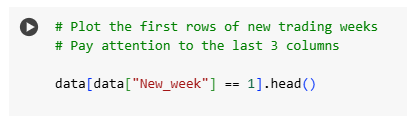

In [39]:
data[data["New_week"] == 1].head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T,Local_time_T_shipt_1_Down,Local_time_T_Delta,New_day,New_week
0,2064.562,2067.475,2064.075,2065.686,0.11843,2062.598,2066.595,2062.405,2065.214,0.12012,0.00169,-1.964,-0.880,-1.670,-0.472,2024-01-01 23:00:00+00:00,NaT,2 days 01:01:00,1,1
1104,2046.355,2046.445,2043.702,2044.966,0.13458,2044.385,2045.005,2042.825,2044.494,0.16514,0.03056,-1.970,-1.440,-0.877,-0.472,2024-01-07 23:00:00+00:00,2024-01-05 21:55:00+00:00,2 days 01:05:00,1,1
2484,2050.302,2050.302,2047.302,2048.216,0.21842,2048.498,2048.598,2046.698,2047.705,0.22412,0.00570,-1.804,-1.704,-0.604,-0.511,2024-01-14 23:00:00+00:00,2024-01-12 21:55:00+00:00,2 days 01:05:00,1,1
3834,2030.305,2030.365,2028.502,2029.042,0.12594,2029.715,2029.715,2027.915,2028.505,0.12920,0.00326,-0.590,-0.650,-0.587,-0.537,2024-01-21 23:00:00+00:00,2024-01-19 21:55:00+00:00,2 days 01:05:00,1,1
5214,2025.245,2027.776,2023.545,2024.145,0.27963,2024.215,2027.014,2022.854,2023.515,0.25994,0.01969,-1.030,-0.762,-0.691,-0.630,2024-01-28 23:00:00+00:00,2024-01-26 21:55:00+00:00,2 days 01:05:00,1,1


In [ ]:
#

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,...,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T,Local_time_T_shipt_1_Down,Local_time_T_Delta,New_day,New_week
0,2062.598,2066.595,2062.405,2065.214,0.12012,2064.562,2067.475,2064.075,2065.686,0.11843,...,0.00169,1.964,0.880,1.670,0.472,2024-01-01 23:00:00+00:00,NaT,2 days 01:01:00,1,1
1104,2044.385,2045.005,2042.825,2044.494,0.16514,2046.355,2046.445,2043.702,2044.966,0.13458,...,0.03056,1.970,1.440,0.877,0.472,2024-01-07 23:00:00+00:00,2024-01-05 21:55:00+00:00,2 days 01:05:00,1,1
2484,2048.498,2048.598,2046.698,2047.705,0.22412,2050.302,2050.302,2047.302,2048.216,0.21842,...,0.00570,1.804,1.704,0.604,0.511,2024-01-14 23:00:00+00:00,2024-01-12 21:55:00+00:00,2 days 01:05:00,1,1
3834,2029.715,2029.715,2027.915,2028.505,0.12920,2030.305,2030.365,2028.502,2029.042,0.12594,...,0.00326,0.590,0.650,0.587,0.537,2024-01-21 23:00:00+00:00,2024-01-19 21:55:00+00:00,2 days 01:05:00,1,1
5214,2024.215,2027.014,2022.854,2023.515,0.25994,2025.245,2027.776,2023.545,2024.145,0.27963,...,0.01969,1.030,0.762,0.691,0.630,2024-01-28 23:00:00+00:00,2024-01-26 21:55:00+00:00,2 days 01:05:00,1,1


______________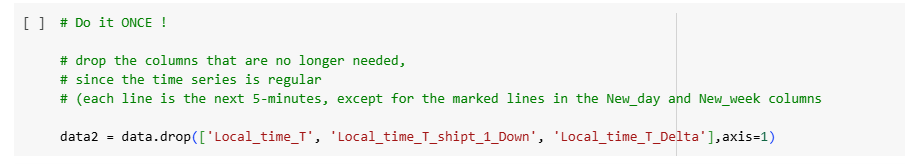

In [40]:
data2 = data.drop(['Local_time_T', 'Local_time_T_shipt_1_Down', 'Local_time_T_Delta'],axis=1)

In [ ]:
#

_____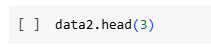

In [41]:
data2.head(3)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week
0,2064.562,2067.475,2064.075,2065.686,0.11843,2062.598,2066.595,2062.405,2065.214,0.12012,0.00169,-1.964,-0.880,-1.670,-0.472,1,1
1,2065.616,2065.839,2064.476,2064.902,0.06906,2065.185,2065.194,2063.851,2064.455,0.06508,0.00398,-0.431,-0.645,-0.625,-0.447,0,0
2,2064.902,2066.825,2064.752,2066.105,0.04203,2064.424,2066.365,2064.395,2065.734,0.03945,0.00258,-0.478,-0.460,-0.357,-0.371,0,0


In [ ]:
#

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week
0,2062.598,2066.595,2062.405,2065.214,0.12012,2064.562,2067.475,2064.075,2065.686,0.11843,-0.00169,0.00169,1.964,0.880,1.670,0.472,1,1
1,2065.185,2065.194,2063.851,2064.455,0.06508,2065.616,2065.839,2064.476,2064.902,0.06906,0.00398,0.00398,0.431,0.645,0.625,0.447,0,0
2,2064.424,2066.365,2064.395,2065.734,0.03945,2064.902,2066.825,2064.752,2066.105,0.04203,0.00258,0.00258,0.478,0.460,0.357,0.371,0,0


____________________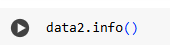

In [42]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35232 entries, 0 to 35231
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open_Bid      35232 non-null  float64
 1   High_Bid      35232 non-null  float64
 2   Low_Bid       35232 non-null  float64
 3   Close_Bid     35232 non-null  float64
 4   Volume_Bid    35232 non-null  float64
 5   Open_Ask      35232 non-null  float64
 6   High_Ask      35232 non-null  float64
 7   Low_Ask       35232 non-null  float64
 8   Close_Ask     35232 non-null  float64
 9   Volume_Ask    35232 non-null  float64
 10  Volume_Delta  35232 non-null  float64
 11  Open_Delta    35232 non-null  float64
 12  High_Delta    35232 non-null  float64
 13  Low_Delta     35232 non-null  float64
 14  Close_Delta   35232 non-null  float64
 15  New_day       35232 non-null  int64  
 16  New_week      35232 non-null  int64  
dtypes: float64(15), int64(2)
memory usage: 4.6 MB


In [ ]:
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35232 entries, 0 to 35231
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35232 non-null  float64
 1   High_Bid          35232 non-null  float64
 2   Low_Bid           35232 non-null  float64
 3   Close_Bid         35232 non-null  float64
 4   Volume_Bid        35232 non-null  float64
 5   Open_Ask          35232 non-null  float64
 6   High_Ask          35232 non-null  float64
 7   Low_Ask           35232 non-null  float64
 8   Close_Ask         35232 non-null  float64
 9   Volume_Ask        35232 non-null  float64
 10  Volume_Delta      35232 non-null  float64
 11  Volume_Delta_abs  35232 non-null  float64
 12  Open_Delta        35232 non-null  float64
 13  High_Delta        35232 non-null  float64
 14  Low_Delta         35232 non-null  float64
 15  Close_Delta       35232 non-null  float64
 16  New_day           35232 non-null  int64 

__________________________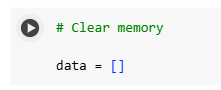

In [43]:
data = []

In [ ]:
#

## We will look for rows with potential take-profit = $10


- create 'High_Bid' and 'Low_Ask' 4 hours ahead
- that is, the maximum holding of a position is no more than 4 hours
- 4 hours is 48 of 5-minute intervals


______________________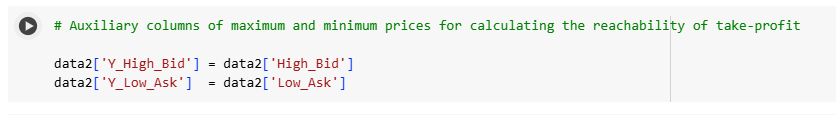

In [44]:
data2['Y_High_Bid'] = data2['High_Bid']
data2['Y_Low_Ask'] = data2['Low_Ask']

In [ ]:
#

___________________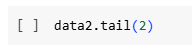

In [45]:
data2.tail(2)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
35230,2325.945,2325.945,2325.555,2325.795,0.02880,2325.515,2325.525,2325.125,2325.385,0.09813,0.06933,-0.430,-0.420,-0.430,-0.41,0,0,2325.945,2325.125
35231,2325.825,2325.835,2325.066,2325.245,0.07257,2325.438,2325.438,2324.625,2324.825,0.07851,0.00594,-0.387,-0.397,-0.441,-0.42,0,0,2325.835,2324.625


In [ ]:
#

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
35230,2325.515,2325.525,2325.125,2325.385,0.09813,2325.945,2325.945,2325.555,2325.795,0.02880,-0.06933,0.06933,0.430,0.420,0.430,0.41,0,0,2325.525,2325.555
35231,2325.438,2325.438,2324.625,2324.825,0.07851,2325.825,2325.835,2325.066,2325.245,0.07257,-0.00594,0.00594,0.387,0.397,0.441,0.42,0,0,2325.438,2325.066


<html> <h3 style="font-style:italic; color:blue;"> Data Normalisation </h3> </html>

In [ ]:
# We do price normalisation simply by dividing all prices by 1000 (for Gold)
# It is not essential that the normalised prices were in the range between [0,1]
# It is more important that the variables were approximately of the same order

In [ ]:
# Only applicable to Volumes and Deltas:

# normalisation
# data=(data-data.min())/(data.max()-data.min())

##### Find Max and Min for Prices, Volumes and Deltas

In [ ]:
# Max price is Max High_Ask
# Min price is Min Low_Bid

# Max Volume = Max{Volume_Bid, Volume_Ask}
# Min Volume = 0

# Max_Delta = Max{Open_Delta, High_Delta, Low_Delta, Close_Delta}
# Min_Delta = Min{Open_Delta, High_Delta, Low_Delta, Close_Delta}

_______________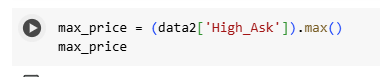

In [46]:
max_price = (data2['High_Ask']).max()
max_price

2449.985

In [ ]:
#

2450.325

__________________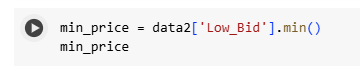

In [47]:
min_price = (data2['Low_Bid']).min()
min_price

1984.475

In [ ]:
#

1984.088

<html> <h4 style="font-style:italic; color:blue;"> Just run the next 2 cells using 'Ctrl' + 'Enter' </h4> </html>

In [48]:
max_volume = max(max(data2['Volume_Bid']), max(data2['Volume_Ask']))
max_volume

2.84268

In [49]:
max_Delta = max(max(data2['Open_Delta']), max(data2['High_Delta']), max(data2['Low_Delta']), max(data2['Close_Delta']))
max_Delta

-0.0010000000002037268

____________________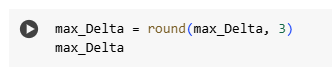

In [50]:
max_Delta = round(max_Delta, 3)
max_Delta

-0.001

In [ ]:
#

5.981

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [51]:
min_Delta = min(min(data2['Open_Delta']), min(data2['High_Delta']), min(data2['Low_Delta']), min(data2['Close_Delta']))
min_Delta

-5.9809999999999945

______________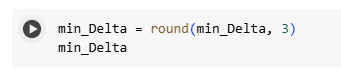

In [52]:
min_Delta = round(min_Delta,3)
min_Delta

-5.981

In [ ]:
#

0.001

______________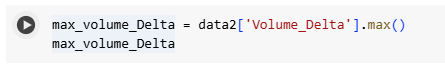

In [53]:
max_volume_Delta = data2['Volume_Delta'].max()
max_volume_Delta

2.70359

In [ ]:
#

2.70359

__________________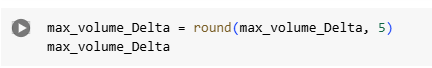

In [54]:
max_volume_Delta = round(max_volume_Delta, 5)
max_volume_Delta

2.70359

In [ ]:
#

2.70359

______________________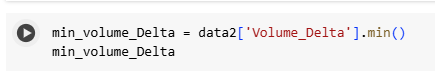

In [55]:
min_volume_Delta = data2['Volume_Delta'].min()
min_volume_Delta

0.0

In [ ]:
#

-1.0644

_________________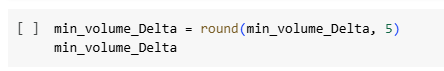

In [56]:
min_volume_Delta = round(min_volume_Delta, 5)
min_volume_Delta

0.0

In [ ]:
#

-1.0644

_________________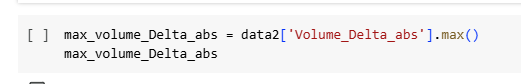

In [57]:
max_volume_Delta_abs = data2['Volume_Delta'].max()
max_volume_Delta_abs

2.70359

2.70359

__________________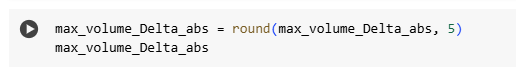

In [58]:
max_volume_Delta_abs = round(max_volume_Delta_abs, 5)
max_volume_Delta_abs

2.70359

In [ ]:
#

2.70359

__________________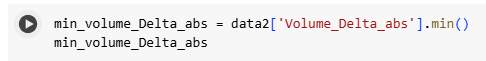

In [59]:
min_volume_Delta_abs = data2['Volume_Delta'].min()
min_volume_Delta_abs

0.0

In [ ]:
#

0.0

In [ ]:
# min_volume_Delta_abs = 0
# Therefore, the normalization formula for volume_Delta_abs is simplified

#### Normalise
Run each cell only one time !

<html> <h4 style="font-style:italic; color:blue;"> Just run the next 5 cells with code using 'Ctrl' + 'Enter' </h4> </html>

In [60]:
# Цены просто делим на 100

data2['Open_Bid']   = data2['Open_Bid']   / 1000
data2['High_Bid']   = data2['High_Bid']   / 1000
data2['Low_Bid']    = data2['Low_Bid']    / 1000
data2['Close_Bid']  = data2['Close_Bid']  / 1000

data2['Open_Ask']   = data2['Open_Ask']   / 1000
data2['High_Ask']   = data2['High_Ask']   / 1000
data2['Low_Ask']    = data2['Low_Ask']    / 1000
data2['Close_Ask']  = data2['Close_Ask']  / 1000

data2['Y_High_Bid'] = data2['Y_High_Bid'] / 1000
data2['Y_Low_Ask']  = data2['Y_Low_Ask']  / 1000



In [61]:
data2['Volume_Ask']  = data2['Volume_Ask'] / max_volume
data2['Volume_Bid']  = data2['Volume_Bid'] / max_volume

In [62]:
data2['Volume_Delta'] = ( data2['Volume_Delta'] - min_volume_Delta ) / (max_volume_Delta-min_volume_Delta)

In [63]:
data2['Volume_Delta_abs']  = data2['Volume_Delta'] / max_volume_Delta_abs

In [ ]:
# For the price deltas, the minimum difference is more interesting, therefore we apply inverse normalisation
# data= 1 - (data - data.min()) / (data.max() - data.min()) = (data.max() - data) / (data.max() - data.min())


In [64]:
data2['Open_Delta']  = ( max_Delta - data2['Open_Delta'] )  / (max_Delta-min_Delta)
data2['High_Delta']  = ( max_Delta - data2['High_Delta'] )  / (max_Delta-min_Delta)
data2['Low_Delta']   = ( max_Delta - data2['Low_Delta'] )   / (max_Delta-min_Delta)
data2['Close_Delta'] = ( max_Delta - data2['Close_Delta'] ) / (max_Delta-min_Delta)

________________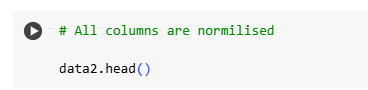

In [65]:
data2.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask,Volume_Delta_abs
0,2.064562,2.067475,2.064075,2.065686,0.041661,2.062598,2.066595,2.062405,2.065214,0.042256,0.000625,0.328261,0.146990,0.279097,0.078763,1,1,2.067475,2.062405,0.000231
1,2.065616,2.065839,2.064476,2.064902,0.024294,2.065185,2.065194,2.063851,2.064455,0.022894,0.001472,0.071906,0.107692,0.104348,0.074582,0,0,2.065839,2.063851,0.000545
2,2.064902,2.066825,2.064752,2.066105,0.014785,2.064424,2.066365,2.064395,2.065734,0.013878,0.000954,0.079766,0.076756,0.059532,0.061873,0,0,2.066825,2.064395,0.000353
3,2.066105,2.066525,2.065415,2.065986,0.011261,2.065715,2.066075,2.065055,2.065585,0.015429,0.004383,0.065050,0.075084,0.060033,0.066890,0,0,2.066525,2.065055,0.001621
4,2.065992,2.066242,2.065645,2.065855,0.011640,2.065585,2.065815,2.065295,2.065555,0.011155,0.000510,0.067893,0.071237,0.058361,0.050000,0,0,2.066242,2.065295,0.000189


In [ ]:
#

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
0,2.062598,2.066595,2.062405,2.065214,0.042256,2.064562,2.067475,2.064075,2.065686,0.041661,0.282036,0.000625,0.671739,0.853010,0.720903,0.921237,1,1,2.066595,2.064075
1,2.065185,2.065194,2.063851,2.064455,0.022894,2.065616,2.065839,2.064476,2.064902,0.024294,0.283541,0.001472,0.928094,0.892308,0.895652,0.925418,0,0,2.065194,2.064476
2,2.064424,2.066365,2.064395,2.065734,0.013878,2.064902,2.066825,2.064752,2.066105,0.014785,0.283170,0.000954,0.920234,0.923244,0.940468,0.938127,0,0,2.066365,2.064752
3,2.065715,2.066075,2.065055,2.065585,0.015429,2.066105,2.066525,2.065415,2.065986,0.011261,0.279340,0.004383,0.934950,0.924916,0.939967,0.933110,0,0,2.066075,2.065415
4,2.065585,2.065815,2.065295,2.065555,0.011155,2.065992,2.066242,2.065645,2.065855,0.011640,0.282851,0.000510,0.932107,0.928763,0.941639,0.950000,0,0,2.065815,2.065645


__________________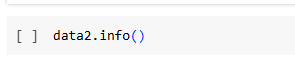

In [66]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35232 entries, 0 to 35231
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35232 non-null  float64
 1   High_Bid          35232 non-null  float64
 2   Low_Bid           35232 non-null  float64
 3   Close_Bid         35232 non-null  float64
 4   Volume_Bid        35232 non-null  float64
 5   Open_Ask          35232 non-null  float64
 6   High_Ask          35232 non-null  float64
 7   Low_Ask           35232 non-null  float64
 8   Close_Ask         35232 non-null  float64
 9   Volume_Ask        35232 non-null  float64
 10  Volume_Delta      35232 non-null  float64
 11  Open_Delta        35232 non-null  float64
 12  High_Delta        35232 non-null  float64
 13  Low_Delta         35232 non-null  float64
 14  Close_Delta       35232 non-null  float64
 15  New_day           35232 non-null  int64  
 16  New_week          35232 non-null  int64 

In [ ]:
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35232 entries, 0 to 35231
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35232 non-null  float64
 1   High_Bid          35232 non-null  float64
 2   Low_Bid           35232 non-null  float64
 3   Close_Bid         35232 non-null  float64
 4   Volume_Bid        35232 non-null  float64
 5   Open_Ask          35232 non-null  float64
 6   High_Ask          35232 non-null  float64
 7   Low_Ask           35232 non-null  float64
 8   Close_Ask         35232 non-null  float64
 9   Volume_Ask        35232 non-null  float64
 10  Volume_Delta      35232 non-null  float64
 11  Volume_Delta_abs  35232 non-null  float64
 12  Open_Delta        35232 non-null  float64
 13  High_Delta        35232 non-null  float64
 14  Low_Delta         35232 non-null  float64
 15  Close_Delta       35232 non-null  float64
 16  New_day           35232 non-null  int64 

### Hint:

You can copy many blocks of text in the cells from the previous 2 weeks of practice sessions.
Some are easy enough to copy, some need to be slightly modified. In any case, this can speed up your code creation.

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [67]:
# Reducing memory size

columns_float =['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
                'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask',
                'Volume_Delta', 'Volume_Delta_abs',
                'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta',
                'Y_High_Bid', 'Y_Low_Ask']

columns_integer =['New_day', 'New_week']



__________________________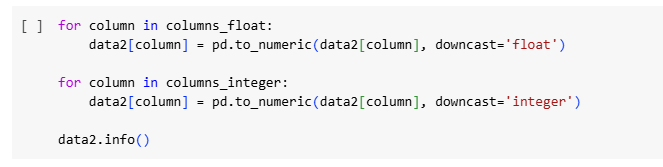

In [68]:
for column in columns_float:
  data2[column] = pd.to_numeric(data2[column], downcast='float')

for column in columns_integer:
  data2[column] = pd.to_numeric(data2[column], downcast='integer')

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35232 entries, 0 to 35231
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35232 non-null  float32
 1   High_Bid          35232 non-null  float32
 2   Low_Bid           35232 non-null  float32
 3   Close_Bid         35232 non-null  float32
 4   Volume_Bid        35232 non-null  float32
 5   Open_Ask          35232 non-null  float32
 6   High_Ask          35232 non-null  float32
 7   Low_Ask           35232 non-null  float32
 8   Close_Ask         35232 non-null  float32
 9   Volume_Ask        35232 non-null  float32
 10  Volume_Delta      35232 non-null  float32
 11  Open_Delta        35232 non-null  float32
 12  High_Delta        35232 non-null  float32
 13  Low_Delta         35232 non-null  float32
 14  Close_Delta       35232 non-null  float32
 15  New_day           35232 non-null  int8   
 16  New_week          35232 non-null  int8  

In [ ]:
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35232 entries, 0 to 35231
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35232 non-null  float32
 1   High_Bid          35232 non-null  float32
 2   Low_Bid           35232 non-null  float32
 3   Close_Bid         35232 non-null  float32
 4   Volume_Bid        35232 non-null  float32
 5   Open_Ask          35232 non-null  float32
 6   High_Ask          35232 non-null  float32
 7   Low_Ask           35232 non-null  float32
 8   Close_Ask         35232 non-null  float32
 9   Volume_Ask        35232 non-null  float32
 10  Volume_Delta      35232 non-null  float32
 11  Volume_Delta_abs  35232 non-null  float32
 12  Open_Delta        35232 non-null  float32
 13  High_Delta        35232 non-null  float32
 14  Low_Delta         35232 non-null  float32
 15  Close_Delta       35232 non-null  float32
 16  New_day           35232 non-null  int8  

We reduced the data memory by more than 2 times: from 5.4 MB to 2.5 MB

____________________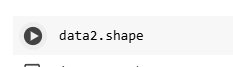

In [69]:
data2.shape

(35232, 20)

In [70]:
#

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

<Figure size 1200x500 with 0 Axes>

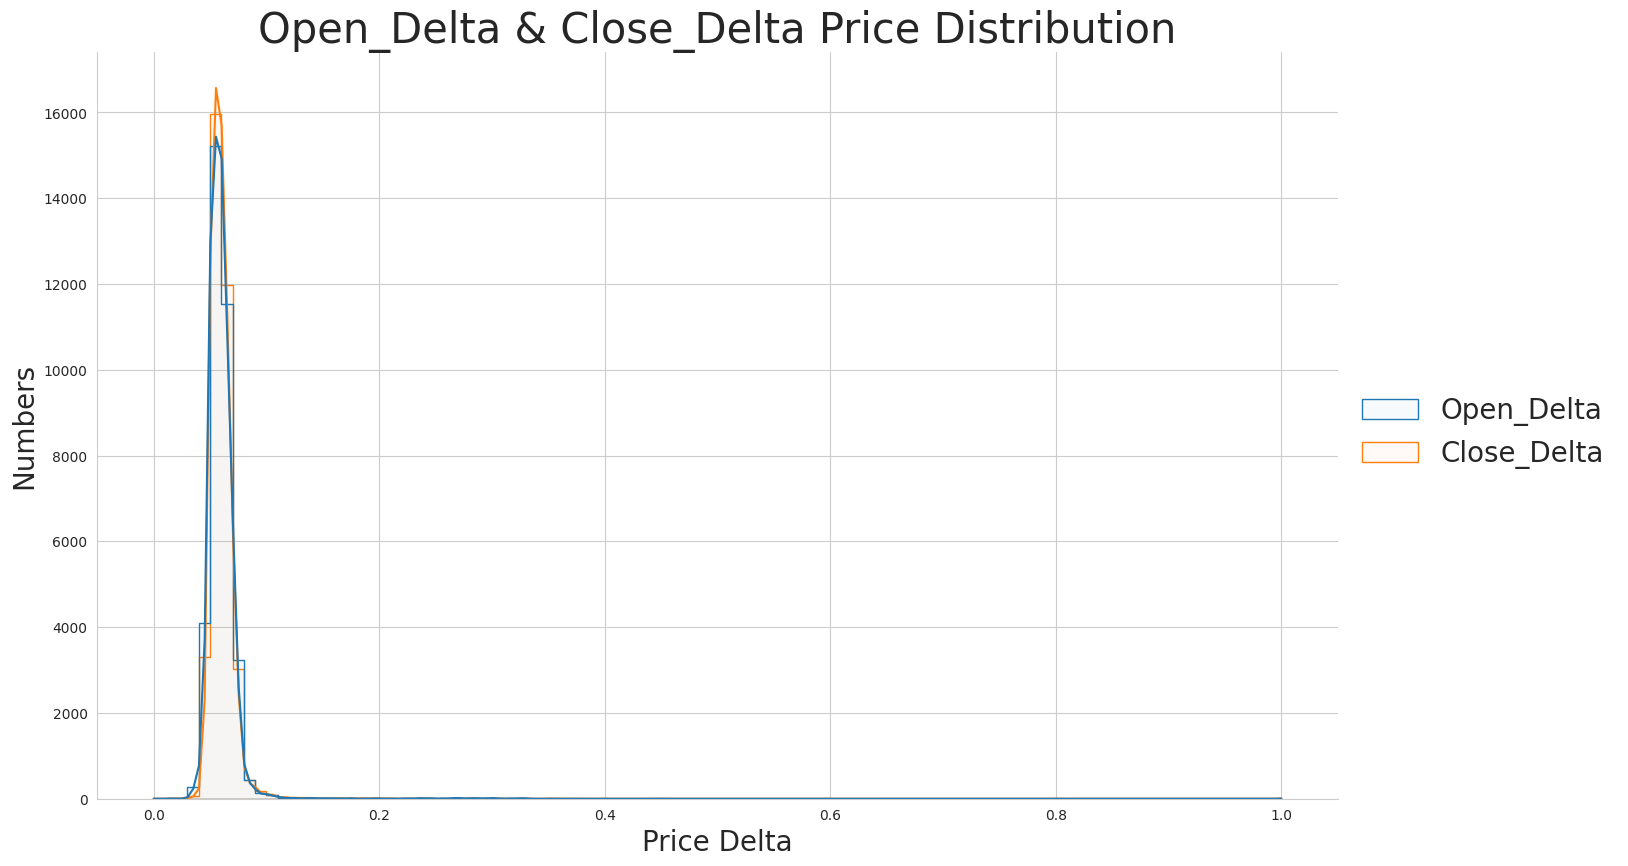

In [71]:
# inverse normalisation of price deltas, the minimum difference is more interesting

fig = plt.figure(figsize=(12, 5))
plt.rc('axes', titlesize= 30 )
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0})

sns.displot(
            data2[['Open_Delta', 'Close_Delta']],
            height=8,
            aspect=1.7,
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,

)

plt.title('Open_Delta & Close_Delta Price Distribution')
plt.xlabel('Price Delta', size= 20)
plt.ylabel('Numbers', size= 20)
plt.show();

### Date transformation


In [ ]:
# We will predict Wait-Attention modes
# Since we have a 5-minute dataset, Then we will shift MiN & MAX prices by 48 rows, which is 4 hours forward

_____________________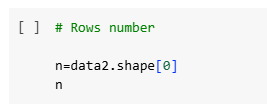

In [72]:
n=data2.shape[0]
n

35232

In [ ]:
#

35232

___________________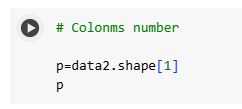

In [73]:
p=data2.shape[1]
p

20

In [ ]:
#

20

_____________________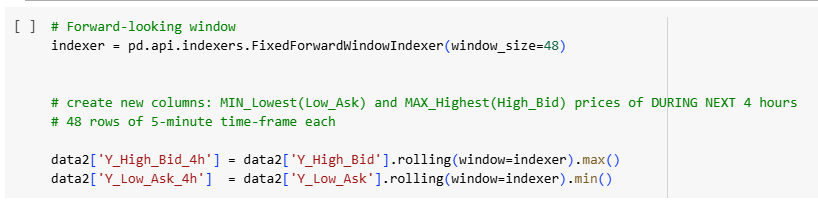

In [74]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=48)
data2['Y_High_Bid_4h'] = data2['Y_High_Bid'].rolling(window=indexer).max()
data2['Y_Low_Ask_4h'] = data2['Y_Low_Ask'].rolling(window=indexer).min()

In [ ]:
#

________________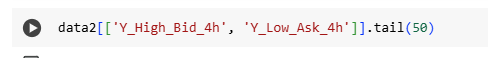

In [75]:
data2[['Y_High_Bid_4h','Y_Low_Ask_4h']].tail(50)

,Y_High_Bid_4h,Y_Low_Ask_4h
35182,2.327915,2.322505
35183,2.327915,2.322505
35184,2.327915,2.322505
35185,NaN,NaN
35186,NaN,NaN
35187,NaN,NaN
35188,NaN,NaN
35189,NaN,NaN
35190,NaN,NaN
35191,NaN,NaN


In [ ]:
#

,Y_High_Bid_4h,Y_Low_Ask_4h
35182,2.326775,2.323125
35183,2.326775,2.323125
35184,2.326775,2.323125
35185,NaN,NaN
35186,NaN,NaN
35187,NaN,NaN
35188,NaN,NaN
35189,NaN,NaN
35190,NaN,NaN
35191,NaN,NaN


_________________________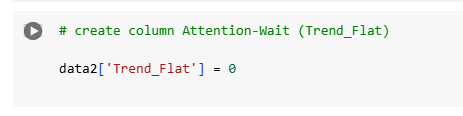

In [76]:
data2['Trend_Flat'] = 0

In [ ]:
#


<html> <h4 style="font-style:italic; color:blue;"> Just run the 2 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [77]:
# Fill in "1s" If the movement (in any direction) within 4 hours is more than $10 (0.01 after the normalisation)

data2.loc[ (data2["Y_High_Bid_4h"] - data2["Close_Ask"]) >= 0.01, 'Trend_Flat'] = 1
print( data2['Trend_Flat'].sum() )

data2.loc[ (data2["Close_Bid"] - data2["Y_Low_Ask_4h"]) >= 0.01, 'Trend_Flat'] = 1
print( data2['Trend_Flat'].sum() )

6481
12052


In [78]:
print(((data2["Y_High_Bid_4h"] - data2["Close_Ask"])>= 0.01).sum())
print(((data2["Close_Bid"] - data2["Y_Low_Ask_4h"])>= 0.01).sum())

6481
6190


In [ ]:
# (5767+5450) = 11217
# 11217-10758 = 459       # rows after which the price moved in both directions by $10 or more

__________________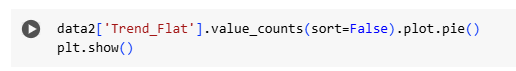

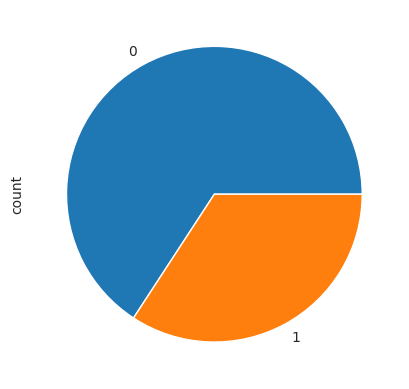

In [79]:
data2['Trend_Flat'].value_counts(sort=False).plot.pie()
plt.show()

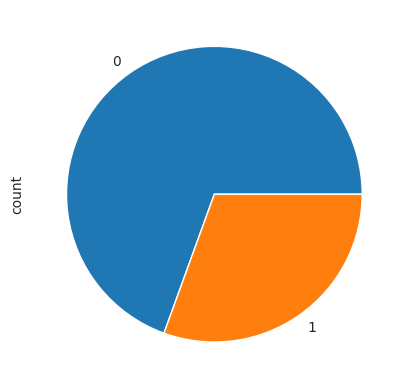

In [ ]:
#

In [ ]:
# The dataset is unbalanced

____________________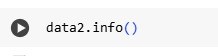

In [80]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35232 entries, 0 to 35231
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35232 non-null  float32
 1   High_Bid          35232 non-null  float32
 2   Low_Bid           35232 non-null  float32
 3   Close_Bid         35232 non-null  float32
 4   Volume_Bid        35232 non-null  float32
 5   Open_Ask          35232 non-null  float32
 6   High_Ask          35232 non-null  float32
 7   Low_Ask           35232 non-null  float32
 8   Close_Ask         35232 non-null  float32
 9   Volume_Ask        35232 non-null  float32
 10  Volume_Delta      35232 non-null  float32
 11  Open_Delta        35232 non-null  float32
 12  High_Delta        35232 non-null  float32
 13  Low_Delta         35232 non-null  float32
 14  Close_Delta       35232 non-null  float32
 15  New_day           35232 non-null  int8   
 16  New_week          35232 non-null  int8  

In [ ]:
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35232 entries, 0 to 35231
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35232 non-null  float32
 1   High_Bid          35232 non-null  float32
 2   Low_Bid           35232 non-null  float32
 3   Close_Bid         35232 non-null  float32
 4   Volume_Bid        35232 non-null  float32
 5   Open_Ask          35232 non-null  float32
 6   High_Ask          35232 non-null  float32
 7   Low_Ask           35232 non-null  float32
 8   Close_Ask         35232 non-null  float32
 9   Volume_Ask        35232 non-null  float32
 10  Volume_Delta      35232 non-null  float32
 11  Volume_Delta_abs  35232 non-null  float32
 12  Open_Delta        35232 non-null  float32
 13  High_Delta        35232 non-null  float32
 14  Low_Delta         35232 non-null  float32
 15  Close_Delta       35232 non-null  float32
 16  New_day           35232 non-null  int8  

_____________________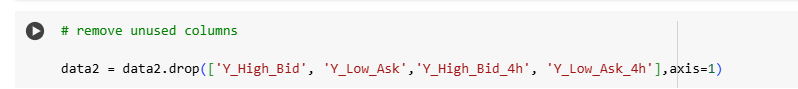

In [81]:
data2 = data2.drop(['Y_High_Bid', 'Y_Low_Ask','Y_High_Bid_4h','Y_Low_Ask_4h'],axis=1)

In [ ]:
#

__________________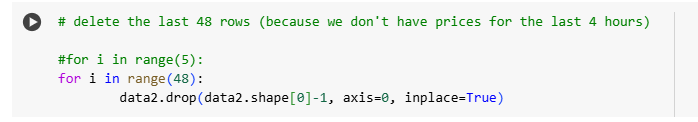

In [82]:
for i in range(48):
  data2.drop(data2.shape[0]-1, axis=0, inplace=True)

In [ ]:
#

____________________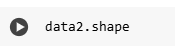

In [83]:
data2.shape

(35184, 19)

In [ ]:
#

(35184, 19)

_______________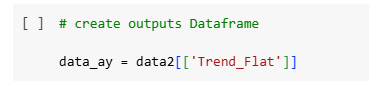

In [84]:
data_ay = data2[['Trend_Flat']]

In [ ]:
#

__________________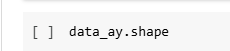

In [85]:
data_ay.shape

(35184, 1)

In [ ]:
#

(35184, 1)

_________________________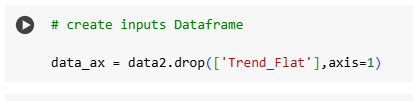

In [86]:
data_ax = data2.drop(['Trend_Flat'],axis=1)

In [ ]:
#

______________________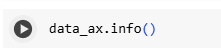

In [87]:
data_ax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35184 entries, 0 to 35183
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35184 non-null  float32
 1   High_Bid          35184 non-null  float32
 2   Low_Bid           35184 non-null  float32
 3   Close_Bid         35184 non-null  float32
 4   Volume_Bid        35184 non-null  float32
 5   Open_Ask          35184 non-null  float32
 6   High_Ask          35184 non-null  float32
 7   Low_Ask           35184 non-null  float32
 8   Close_Ask         35184 non-null  float32
 9   Volume_Ask        35184 non-null  float32
 10  Volume_Delta      35184 non-null  float32
 11  Open_Delta        35184 non-null  float32
 12  High_Delta        35184 non-null  float32
 13  Low_Delta         35184 non-null  float32
 14  Close_Delta       35184 non-null  float32
 15  New_day           35184 non-null  int8   
 16  New_week          35184 non-null  int8  

In [ ]:
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35184 entries, 0 to 35183
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35184 non-null  float32
 1   High_Bid          35184 non-null  float32
 2   Low_Bid           35184 non-null  float32
 3   Close_Bid         35184 non-null  float32
 4   Volume_Bid        35184 non-null  float32
 5   Open_Ask          35184 non-null  float32
 6   High_Ask          35184 non-null  float32
 7   Low_Ask           35184 non-null  float32
 8   Close_Ask         35184 non-null  float32
 9   Volume_Ask        35184 non-null  float32
 10  Volume_Delta      35184 non-null  float32
 11  Volume_Delta_abs  35184 non-null  float32
 12  Open_Delta        35184 non-null  float32
 13  High_Delta        35184 non-null  float32
 14  Low_Delta         35184 non-null  float32
 15  Close_Delta       35184 non-null  float32
 16  New_day           35184 non-null  int8  

____________________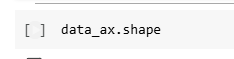

In [88]:
data_ax.shape

(35184, 18)

In [ ]:
#

(35184, 18)

<html> <h4 style="font-style:italic; color:blue;"> Just run the 2 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [89]:
# Create inputs Numpy

data_a = np.array(data_ax)

with np.printoptions(precision=4):
    print("data_a:")
    print(data_a[:2,:])
    print('\n')
    print(data_a[-2:,:])

print("numpy size: = ", data_a.shape)
print("type: ", data_a.dtype)


data_a:
[[2.0646e+00 2.0675e+00 2.0641e+00 2.0657e+00 4.1661e-02 2.0626e+00
  2.0666e+00 2.0624e+00 2.0652e+00 4.2256e-02 6.2509e-04 3.2826e-01
  1.4699e-01 2.7910e-01 7.8763e-02 1.0000e+00 1.0000e+00 2.3121e-04]
 [2.0656e+00 2.0658e+00 2.0645e+00 2.0649e+00 2.4294e-02 2.0652e+00
  2.0652e+00 2.0639e+00 2.0645e+00 2.2894e-02 1.4721e-03 7.1906e-02
  1.0769e-01 1.0435e-01 7.4582e-02 0.0000e+00 0.0000e+00 5.4450e-04]]


[[2.3261e+00 2.3263e+00 2.3259e+00 2.3262e+00 5.3847e-02 2.3258e+00
  2.3260e+00 2.3256e+00 2.3259e+00 2.7629e-02 2.7567e-02 6.0702e-02
  5.4515e-02 5.2843e-02 6.0702e-02 0.0000e+00 0.0000e+00 1.0196e-02]
 [2.3262e+00 2.3264e+00 2.3256e+00 2.3260e+00 5.5778e-02 2.3259e+00
  2.3260e+00 2.3252e+00 2.3257e+00 5.0308e-02 5.7516e-03 5.4515e-02
  6.0702e-02 6.0033e-02 6.0702e-02 0.0000e+00 0.0000e+00 2.1274e-03]]
numpy size: =  (35184, 18)
type:  float32


In [90]:
# Create outputs Numpy

data_y = np.array(data_ay)

print("data_a:")
print(data_y[:3,:])
print('\n')
print(data_y[-3:,:])

print("numpy size: = ", data_y.shape)
print("type: ", data_y.dtype)

data_a:
[[0]
 [0]
 [0]]


[[0]
 [0]
 [0]]
numpy size: =  (35184, 1)
type:  int64


____________________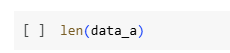

In [91]:
len(data_a)

35184

In [ ]:
#

35184

#### Create the 3D inputs tensor, and 2D outputs matrix

In [ ]:
# Analysis of the entire dataset would take a long time,
# so, please reduce the dataset by about 3 times to 12000 rows

# n_small = 12000 rows (5-minutes), which is around 2 months.

In [ ]:
# We need a three-dimensional data tensor: [(n_small-N ), N, 18] and
# one-dimensional array of answers [(n_small-N ), 1] with the High and Low prices DURING the next 5 minutes

# where N=50 is the number of minutes for analysis at each step; those are looking backwards

# Therefore, we need:
# three-dimensional data tensor of sliced graphs [(n_small - N - 5), N, 18] and
# two-dimensional matrix of answers Y[(n_small - N - 5), 2]
# with the Trend-Flat indicator, indicating whether take profit will be reached within 4 hours or not

___________________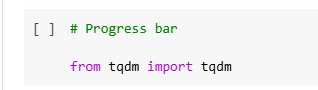

In [92]:
from tqdm import tqdm

In [ ]:
#

<html> <h4 style="font-style:italic; color:blue;"> Just run the next 4 cells using 'Ctrl' + 'Enter' </h4> </html>

In [93]:
# n_small = len(data_y)

n_small = 12000    # reduce the dataset size

N=50               # sliding window depth

L=n_small-N        # number of sliding window slices
t=data_a.shape[1]  # features number
print('Size of a three-dimensional inputs tensor: ',L,N,t)


Size of a three-dimensional inputs tensor:  11950 50 18


In [94]:
# create imputs zeros 3D tensors with 'float32'

data_b = np.zeros( (L, N, t), dtype= 'float32' )

In [95]:
# create a one-dimensional zeros vector of answers

Y = np.zeros((L, 1), dtype= 'float32')  # We will predict Attention - Wait for signals

In [96]:
# fill the imputs 3D tansor (data_b)
# and the array of answers Y


print('L = n_small - N = ', n_small-N, L)
for k in tqdm(range(L)):
    data_b[k, :, :] = data_a[k:k+N, :]

    Y[k,0] = data_y[k+N-1,0]   # Trend-Flat signal

print(k)                       # index value (for control)

print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

L = n_small - N =  11950 11950


100%|██████████| 11950/11950 [00:00<00:00, 224321.44it/s]

11949
data_b: 
 [[[2.0645621e+00 2.0674751e+00 2.0640750e+00 ... 1.0000000e+00
   1.0000000e+00 2.3120917e-04]
  [2.0656159e+00 2.0658391e+00 2.0644760e+00 ... 0.0000000e+00
   0.0000000e+00 5.4450444e-04]
  [2.0649021e+00 2.0668249e+00 2.0647521e+00 ... 0.0000000e+00
   0.0000000e+00 3.5297021e-04]
  ...
  [2.0677049e+00 2.0681050e+00 2.0675850e+00 ... 0.0000000e+00
   0.0000000e+00 8.3413152e-03]
  [2.0680349e+00 2.0680649e+00 2.0667350e+00 ... 0.0000000e+00
   0.0000000e+00 7.8802649e-04]
  [2.0672851e+00 2.0688951e+00 2.0672350e+00 ... 0.0000000e+00
   0.0000000e+00 6.4588073e-03]]

 [[2.0656159e+00 2.0658391e+00 2.0644760e+00 ... 0.0000000e+00
   0.0000000e+00 5.4450444e-04]
  [2.0649021e+00 2.0668249e+00 2.0647521e+00 ... 0.0000000e+00
   0.0000000e+00 3.5297021e-04]
  [2.0661049e+00 2.0665250e+00 2.0654149e+00 ... 0.0000000e+00
   0.0000000e+00 1.6212004e-03]
  ...
  [2.0680349e+00 2.0680649e+00 2.0667350e+00 ... 0.0000000e+00
   0.0000000e+00 7.8802649e-04]
  [2.0672851e+00 2.0

________________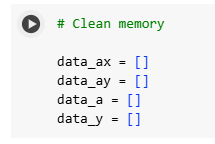

In [97]:
data_ax = []
data_ay = []
data_a = []
data_y = []

In [ ]:
#

### Train Test Split
- 90% for training and validation
- 10% for testing

________________________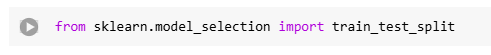

In [98]:
from sklearn.model_selection import train_test_split

In [ ]:
#

<html> <h3 style="font-style:bold; color:red;"> !!! Use parameters: shuffle = False, stratify = None

Otherwise, the whole time series will be mixed up!
</h3> </html>

_________________________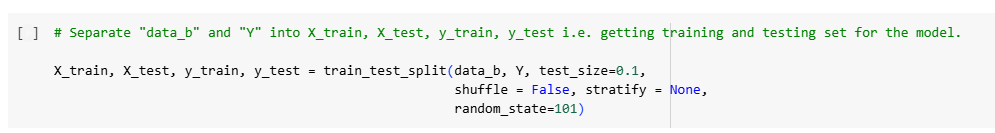

In [99]:
X_train, X_test, y_train, y_test = train_test_split(data_b,Y,test_size=0.1,shuffle = False, stratify = None,random_state=101)

In [ ]:
#

___________________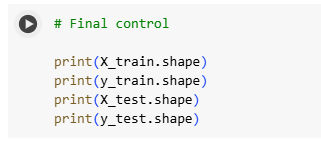

In [100]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10755, 50, 18)
(1195, 50, 18)
(10755, 1)
(1195, 1)


In [ ]:
#

(10755, 50, 18)
(10755, 1)
(1195, 50, 18)
(1195, 1)


#### Balancing Classes in the Dataset

In [ ]:
# Use class weights (class_weight) in the fit method to make the model "pay more attention" to the smaller class.

__________________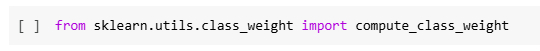

In [101]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
#

_____________________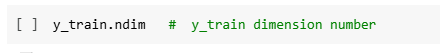

In [102]:
y_train.ndim

2

In [ ]:
#

2

_____________________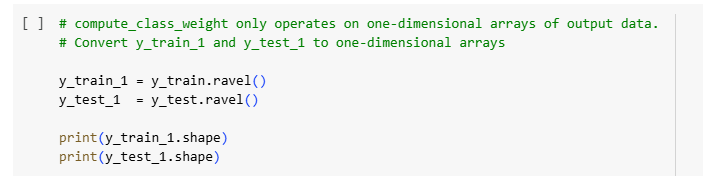

In [103]:
y_train_1 = y_train.ravel()
y_test_1 = y_test.ravel()
print(y_train_1.shape)
print(y_test_1.shape)

(10755,)
(1195,)


In [ ]:
#

(10755,)
(1195,)


<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [104]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_1), y=y_train_1)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

____________________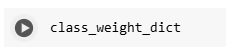

In [105]:
class_weight_dict

{0: np.float64(0.6094174977334542), 1: np.float64(2.784826514759192)}

In [ ]:
#

{0: 0.5886699507389163, 1: 3.3194444444444446}

### Training

#### LSTM

____________________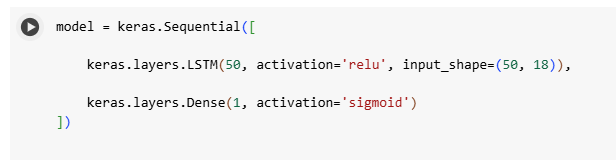

In [106]:
model = keras.Sequential([
    keras.layers.LSTM(50, activation='relu',input_shape=(50,18)),
    keras.layers.Dense(1, activation='sigmoid')
  ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


________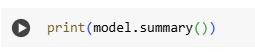

In [107]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          13,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,851 (54.11 KB)

 Trainable params: 13,851 (54.11 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
#

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          13,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,851 (54.11 KB)

 Trainable params: 13,851 (54.11 KB)

 Non-trainable params: 0 (0.00 B)

None


_________________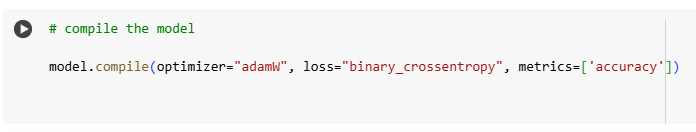

In [108]:
model.compile(optimizer="adamW", loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
#


#### Callbacks

________________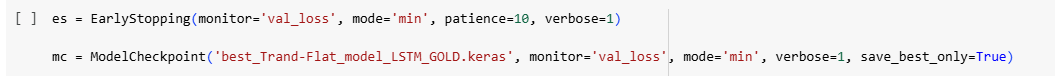

In [109]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_Trand-Flat_model_LSTM_Gold.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
#

<html> <h4 style="font-style:bold; color:blue;"> If you are using your own laptop without a GPU (Graphics processing unit) and outiside of the Google Colab,

please change the following parameter in the next cell
</h4> </html>

<html> <h4 style="font-style:bold; color:red;">
epochs=10
</h4> </html>


_________________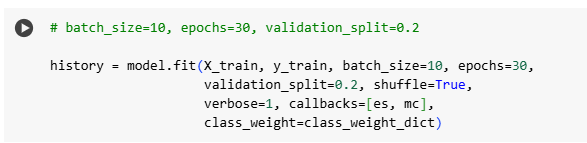

In [110]:
history = model.fit(X_train, y_train, batch_size=10, epochs=30, verbose=1,validation_split=0.2,shuffle=True,callbacks=[es, mc], class_weight=class_weight_dict)

Epoch 1/30
861/861 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3308 - loss: 0.7333
Epoch 1: val_loss improved from inf to 0.77328, saving model to best_Trand-Flat_model_LSTM_Gold.keras
861/861 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3308 - loss: 0.7333 - val_accuracy: 0.0921 - val_loss: 0.7733
Epoch 2/30
859/861 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3781 - loss: 0.7154
Epoch 2: val_loss improved from 0.77328 to 0.62803, saving model to best_Trand-Flat_model_LSTM_Gold.keras
861/861 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3783 - loss: 0.7154 - val_accuracy: 0.8029 - val_loss: 0.6280
Epoch 3/30
857/861 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4961 - loss: 0.7003
Epoch 3: val_loss improved from 0.62803 to 0.50031, saving model to best_Trand-Flat_model_LSTM_Gold.keras
861/861 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4962 - loss: 0.7003 - val_accuracy: 0.8833 - val_loss: 0.5003
Epoch 4/30
857/861 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5435 - lo

In [ ]:
#

Epoch 1/30
861/861 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2727 - loss: 0.7502
Epoch 1: val_loss improved from inf to 0.77054, saving model to best_Trand-Flat_model_LSTM_GOLD.keras
861/861 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.2727 - loss: 0.7501 - val_accuracy: 0.0758 - val_loss: 0.7705
Epoch 2/30
854/861 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3198 - loss: 0.7280
Epoch 2: val_loss did not improve from 0.77054
861/861 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3206 - loss: 0.7278 - val_accuracy: 0.0786 - val_loss: 1.0178
Epoch 3/30
852/861 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5193 - loss: 0.6855
Epoch 3: val_loss did not improve from 0.77054
861/861 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5195 - loss: 0.6855 - val_accuracy: 0.2506 - val_loss: 1.2307
Epoch 4/30
856/861 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5240 - loss: 0.6667
Epoch 4: val_loss improved from 0.77054 to 0.53273, saving model to best_Trand-Flat_model_LSTM_GOLD.keras

_______________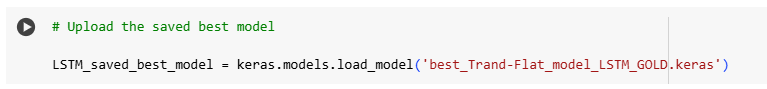

In [111]:
LSTM_saved_best_model = keras.models.load_model('best_Trand-Flat_model_LSTM_Gold.keras')

In [ ]:
#

#### Test

___________________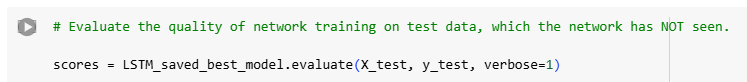

In [112]:
scores = LSTM_saved_best_model.evaluate(X_test, y_test, verbose=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8428 - loss: 0.5133


In [ ]:
#

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7930 - loss: 0.4956


______________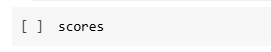

In [113]:
scores

[0.5281278491020203, 0.8234309554100037]

In [ ]:
#

[0.4841421842575073, 0.8025104403495789]

### Visualisation

### Hint:

You can copy many blocks of text in the cells from the previous 2 weeks of practice sessions.
Some are easy enough to copy, some need to be slightly modified. In any case, this can speed up your code creation.

#### Loss function graphs during training

______________________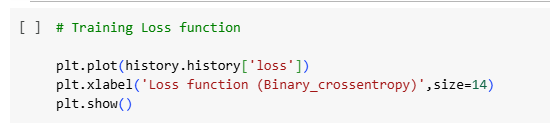

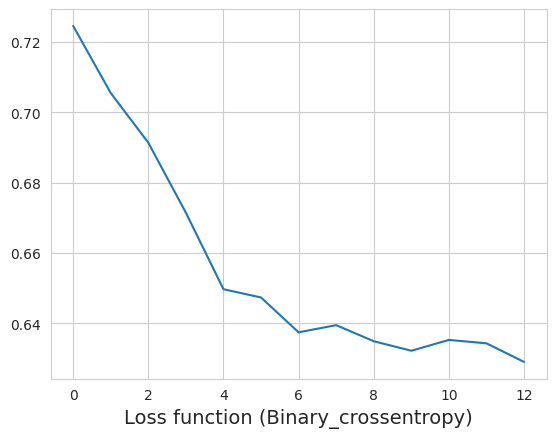

In [114]:
plt.plot(history.history['loss'])
plt.xlabel('Loss function (Binary_crossentropy)',size=14)
plt.show()

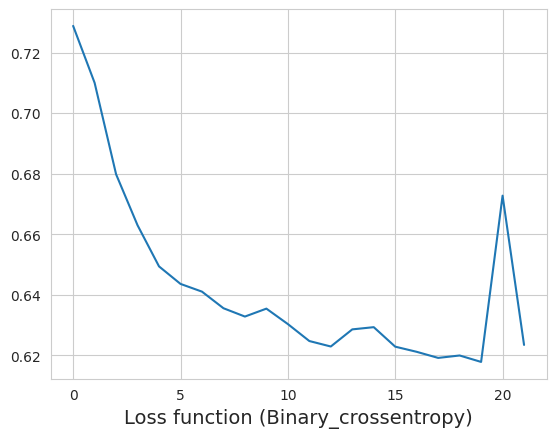

In [ ]:
#

__________________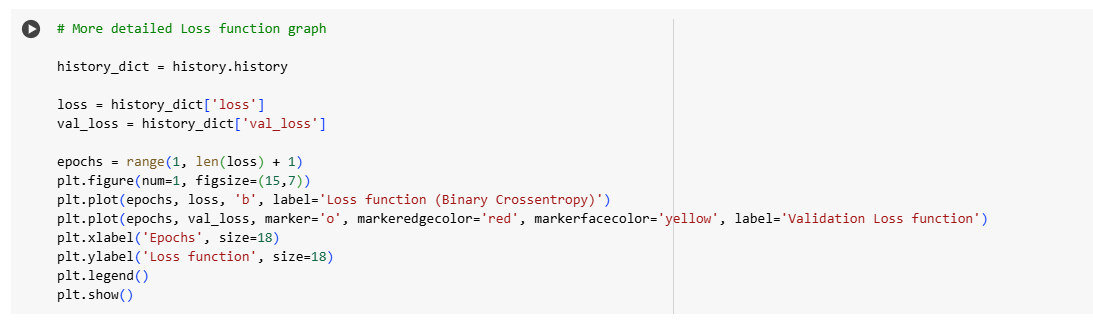

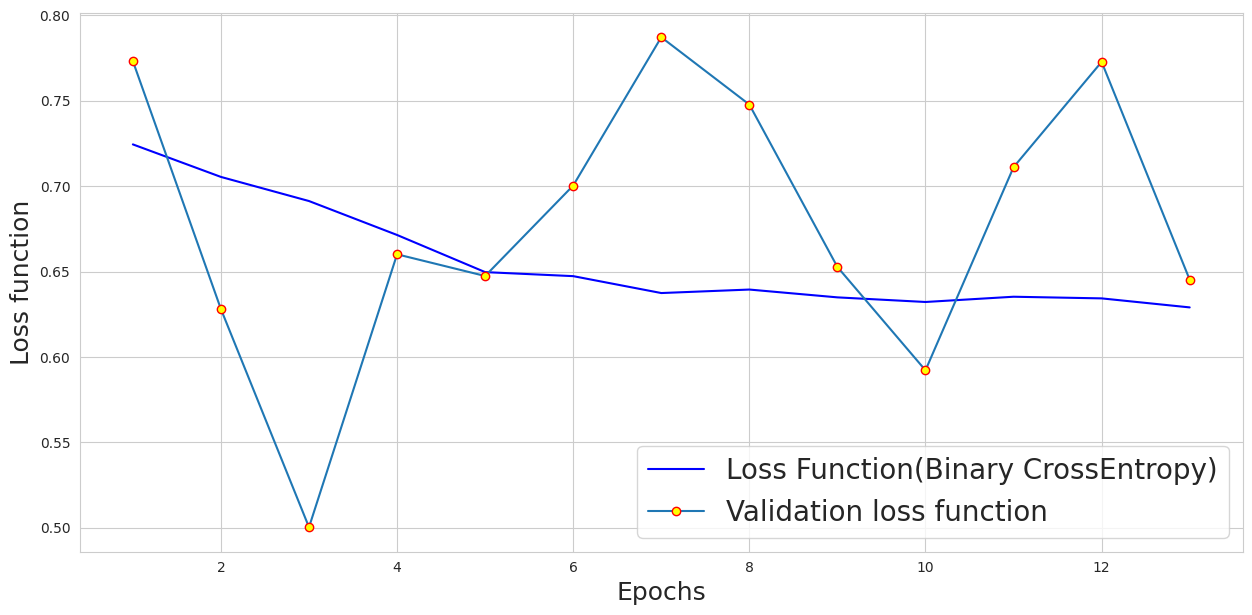

In [115]:
# more detailed loss function grapgh
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(num=1,figsize=(15,7))
plt.plot(epochs, loss, 'b', label='Loss Function(Binary CrossEntropy)')
plt.plot(epochs, val_loss, marker='o',markeredgecolor='red',markerfacecolor='yellow', label='Validation loss function')

plt.xlabel('Epochs',size=18)
plt.ylabel('Loss function', size=18)
plt.legend()
plt.show()

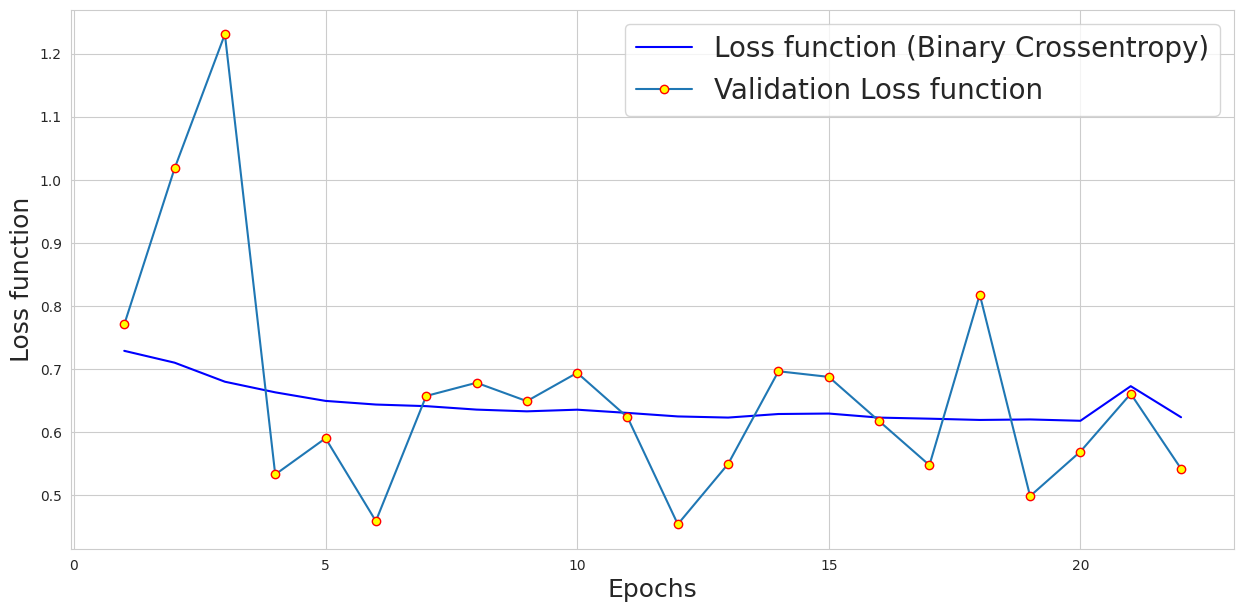

In [ ]:
#

____________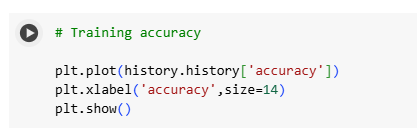

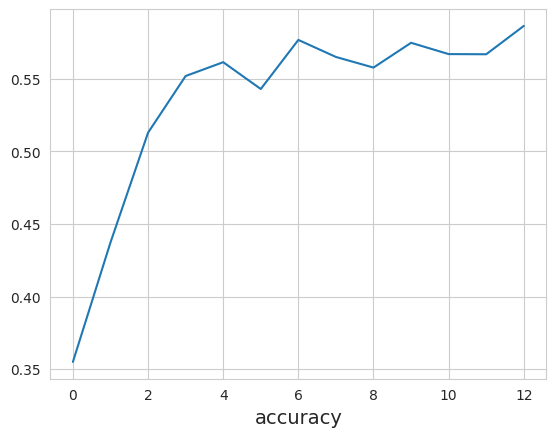

In [116]:
plt.plot(history.history['accuracy'])
plt.xlabel('accuracy',size=14)
plt.show()

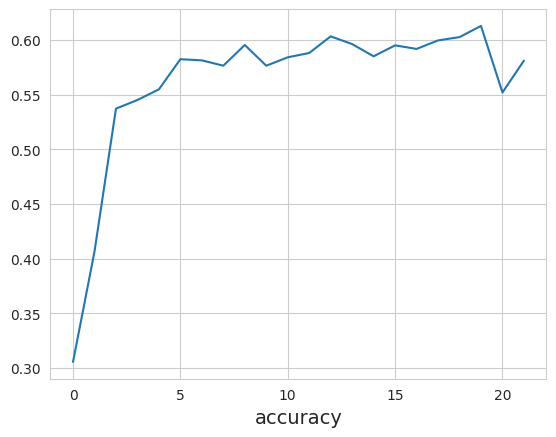

In [ ]:
#

____________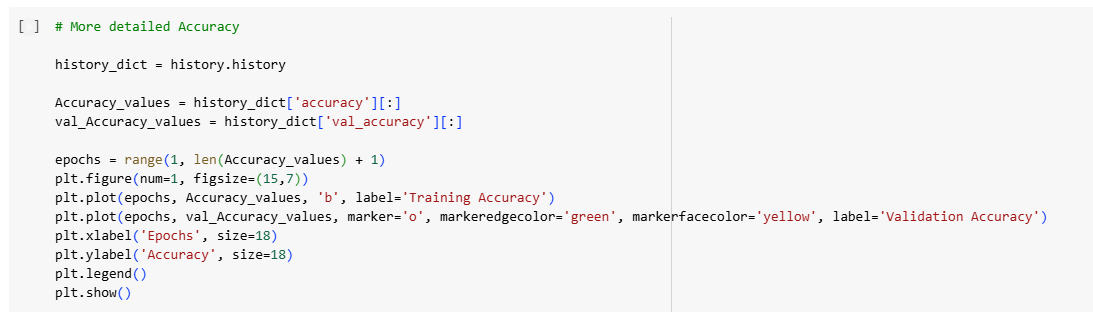

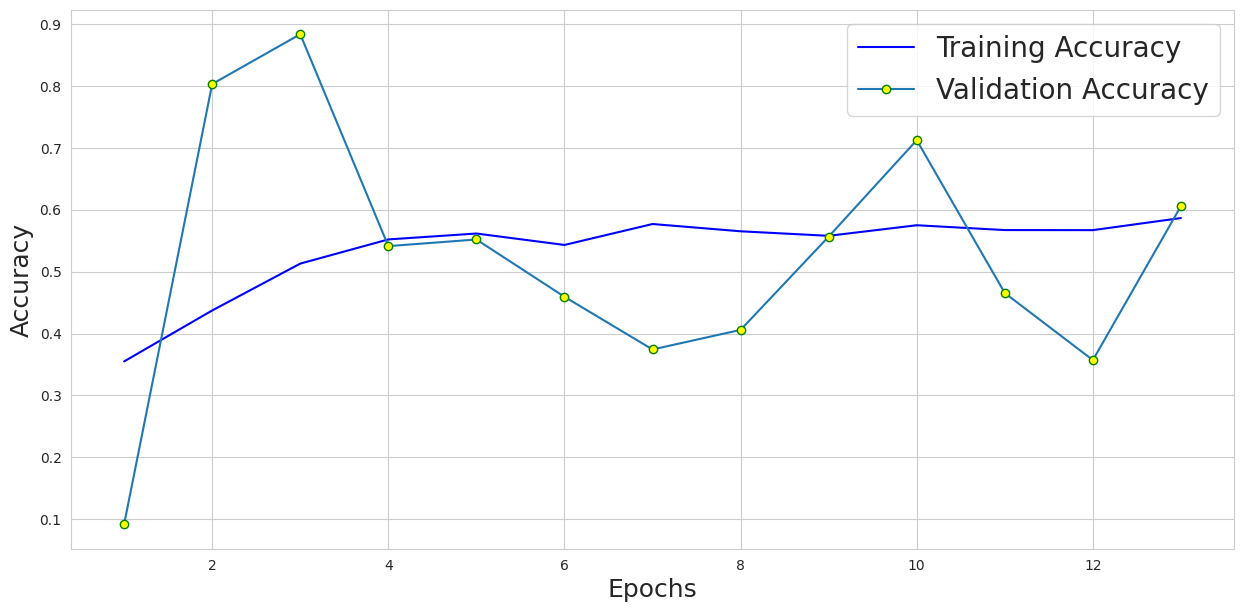

In [117]:
# more detailed Accuracy
history_dict = history.history
Accuracy_values = history_dict['accuracy'][:]
val_Accuracy_values = history_dict['val_accuracy']
epochs = range(1, len(Accuracy_values) + 1)
plt.figure(num=1,figsize=(15,7))
plt.plot(epochs, Accuracy_values, 'b', label='Training Accuracy')
plt.plot(epochs, val_Accuracy_values, marker='o',markeredgecolor='green',markerfacecolor='yellow', label='Validation Accuracy')

plt.xlabel('Epochs',size=18)
plt.ylabel('Accuracy', size=18)
plt.legend()
plt.show()

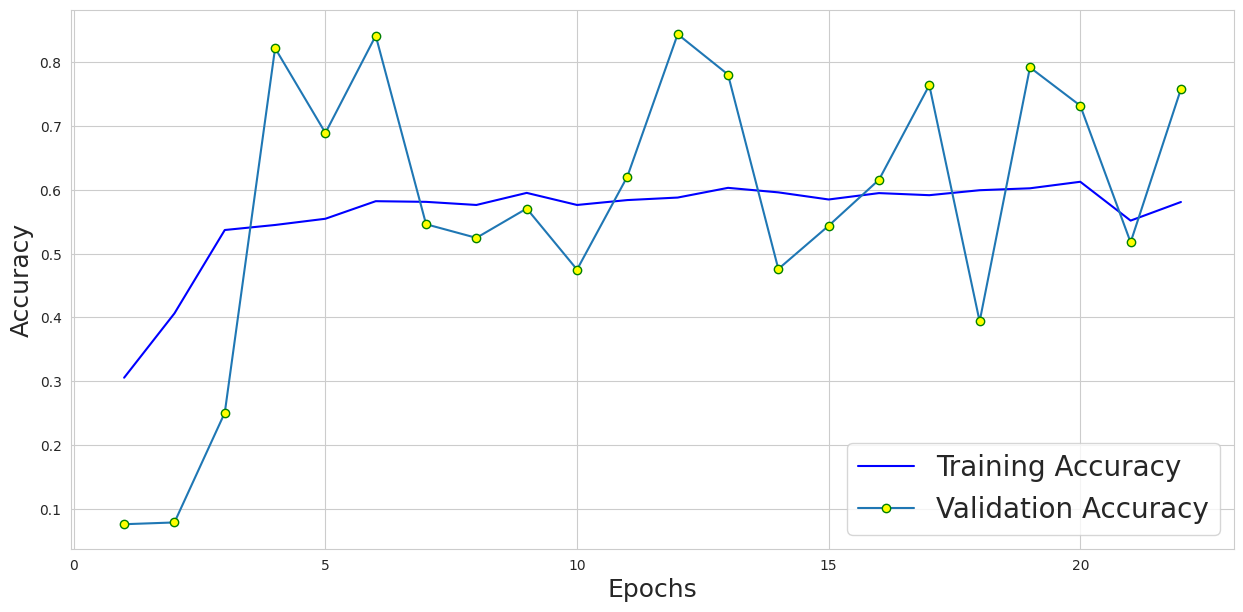

In [ ]:
#

_________________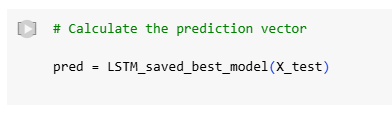

In [118]:
pred = LSTM_saved_best_model(X_test)

In [ ]:
#

______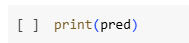

In [119]:
print(pred)

tf.Tensor(
[[0.3845754 ]
 [0.3995133 ]
 [0.40779582]
 ...
 [0.5830047 ]
 [0.6311661 ]
 [0.60024476]], shape=(1195, 1), dtype=float32)


In [ ]:
#

tf.Tensor(
[[0.3518834 ]
 [0.37723827]
 [0.38531053]
 ...
 [0.6038799 ]
 [0.6935297 ]
 [0.6326186 ]], shape=(1195, 1), dtype=float32)


______________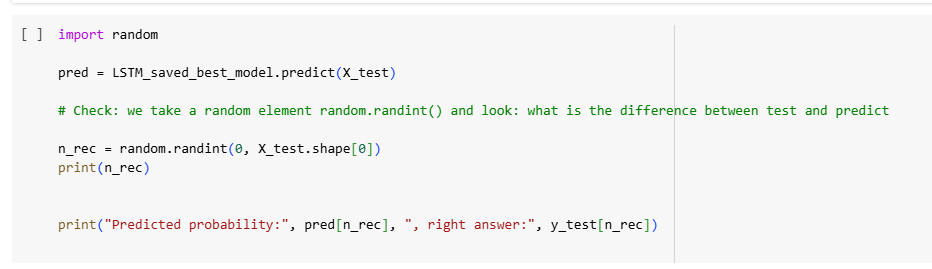

In [120]:
import random
pred = LSTM_saved_best_model.predict(X_test)
n_rec = random.randint(0,X_test.shape[0])
print(n_rec)
print("Predicted Probability:",pred[n_rec],", right answer:",y_test[n_rec])

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
557
Predicted Probability: [0.46471903] , right answer: [0.]


In [ ]:
#

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step
307
Predicted probability: [0.4870965] , right answer: [0.]


______________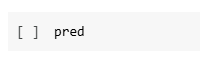

In [121]:
pred

array([[0.38457546],
       [0.3995133 ],
       [0.40779588],
       ...,
       [0.58300465],
       [0.6311661 ],
       [0.60024476]], dtype=float32)

In [ ]:
#

array([[0.3518834 ],
       [0.37723818],
       [0.38531053],
       ...,
       [0.6038799 ],
       [0.6935298 ],
       [0.6326185 ]], dtype=float32)

______________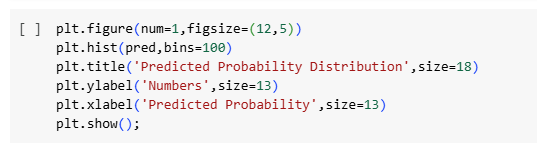

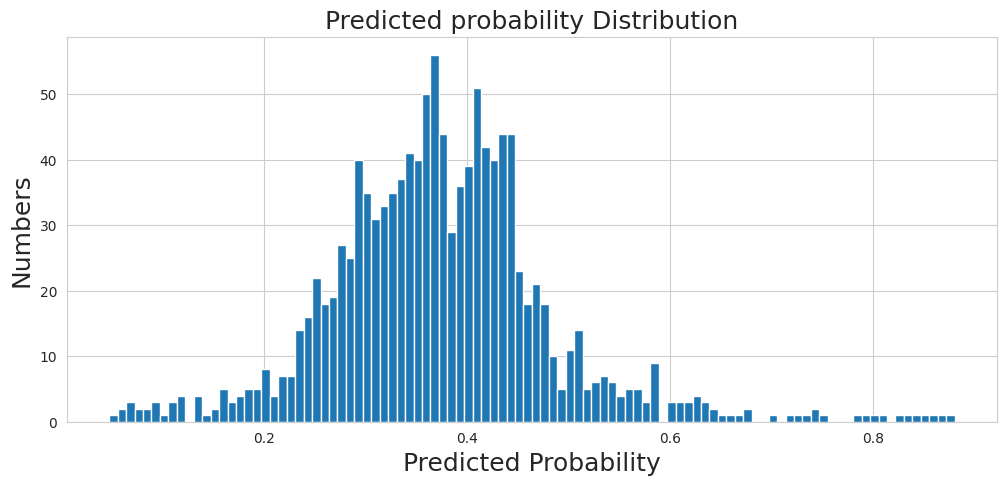

In [122]:
plt.figure(num=1,figsize=(12,5))
plt.hist(pred,bins=100)
plt.title('Predicted probability Distribution',size=18)
plt.xlabel('Predicted Probability',size=18)
plt.ylabel('Numbers',size=18)
plt.show()

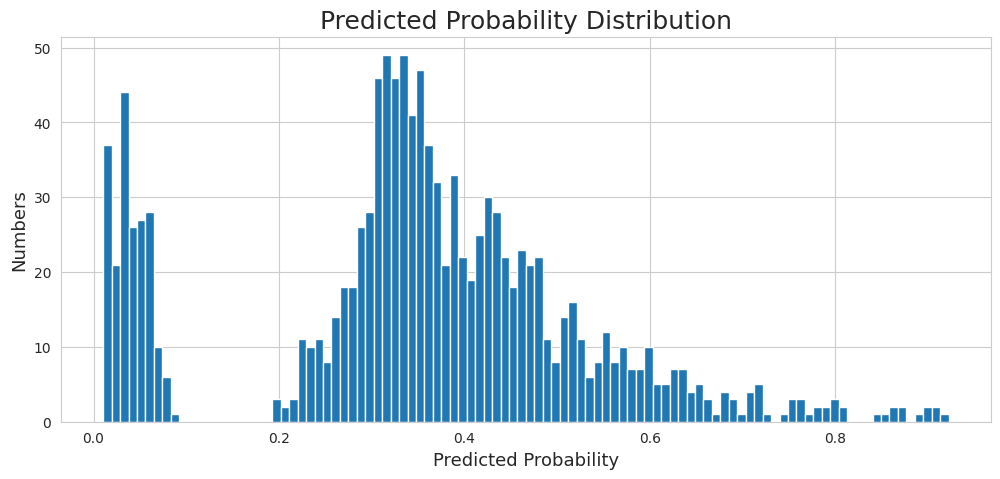

In [ ]:
#

_______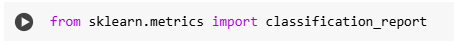

In [123]:
from sklearn.metrics import classification_report

In [ ]:
#

_____________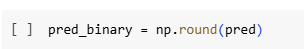

In [124]:
pred_binary = np.round(pred)

In [ ]:
#

_________________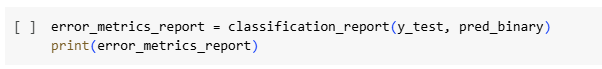

In [125]:
error_metrics_report = classification_report(y_test,pred_binary)
print(error_metrics_report)

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      1046
         1.0       0.22      0.17      0.19       149

    accuracy                           0.82      1195
   macro avg       0.55      0.54      0.55      1195
weighted avg       0.80      0.82      0.81      1195



In [ ]:
#

              precision    recall  f1-score   support

         0.0       0.91      0.86      0.89      1058
         1.0       0.25      0.35      0.29       137

    accuracy                           0.80      1195
   macro avg       0.58      0.61      0.59      1195
weighted avg       0.83      0.80      0.82      1195



### Neural Network Hyperparameters' Optimisation

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [126]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00


_________________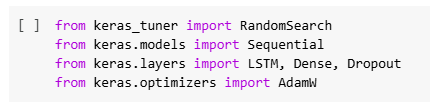

In [127]:
from keras_tuner import RandomSearch
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from keras.optimizers import AdamW

In [ ]:
#

_____________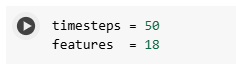

In [128]:
timesteps = 50
features = 18

In [ ]:
#

_______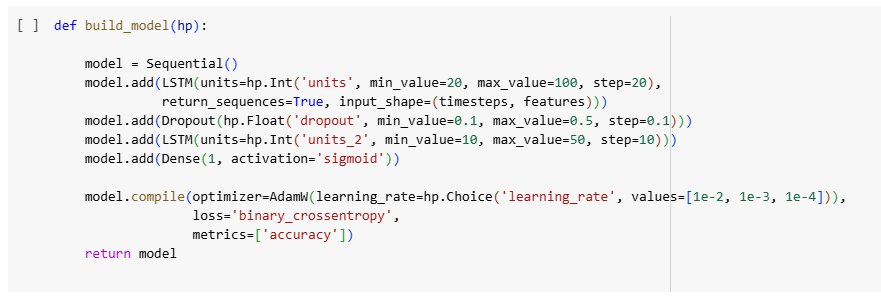

In [129]:
def build_model(hp):
  model = Sequential()
  model.add(LSTM(units=hp.Int('units',min_value=20,max_value=100,step=20),
                 return_sequences=True,input_shape=(timesteps, features)))
  model.add(Dropout(hp.Float('dropout',min_value=0.1,max_value=0.5,step=0.1)))
  model.add(LSTM(units=hp.Int('units_2',min_value=10,max_value=50,step=10)))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=AdamW(learning_rate=hp.Choice('learning_rate', values=[1e-2,1e-3,1e-4])),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
#

__________________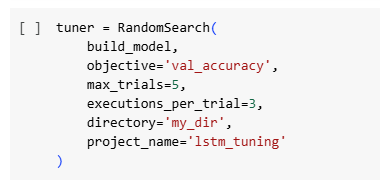

In [130]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='lstm_tuning')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#

Reloading Tuner from my_dir/lstm_tuning/tuner0.json


___________________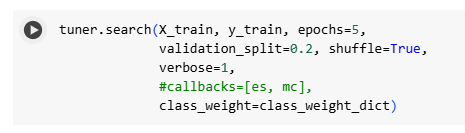

In [131]:
tuner.search(X_train,y_train,epochs=5,validation_split=0.2,shuffle=True,verbose=1,class_weight=class_weight_dict)

Trial 5 Complete [00h 01m 00s]
val_accuracy: 0.08042770624160767

Best val_accuracy So Far: 0.8197737534840902
Total elapsed time: 00h 05m 05s


In [ ]:
#

Trial 5 Complete [00h 00m 54s]
val_accuracy: 0.2907174949844678

Best val_accuracy So Far: 0.9325894713401794
Total elapsed time: 00h 06m 44s


__________________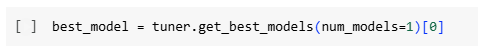

In [132]:
best_model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
#

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


_________________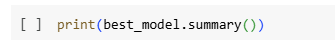

In [133]:
print(best_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 100)             │          47,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30)                  │          15,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,351 (247.46 KB)

 Trainable params: 63,351 (247.46 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
#

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 40)              │           9,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 40)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          18,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,075 (324.52 KB)

 Trainable params: 27,691 (108.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 55,384 (216.35 KB)

None


# Lab Logbook Requirement:

<html> <h3 style="; color:blue;">
   
1) Modify the training parameter of the optimised best LSTM model using the following formulas:

Modify the number of epochs:
Z + 30
, where your SID is: XXXXXXZ

Modify the batch_size:
Z + 10
, where your SID is: XXXXXXZ

2) Leave other parameters the same as in the practical session.
3) Use EarlyStopping() and ModelCheckpoint() functions.
4) Train the optimised best LSTM model with the same datasets and your training parameters.
5) Calculate and demonstrate the received test Accuracy and other error metrics for the classification task.
6) Plot the "More detailed Accuracy" graph.
7) Please only add to your Lab Logbook print-screens of:
- code your Use EarlyStopping() and ModelCheckpoint() functions
- code and training result using model.fit()
- the resulting test Accuracy and other error metrics for the classification task using classification_report().
- Accuracy detailed graph
    
</h3> </html>

<html> <h3 style="color:red;">
NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.
</h3> </html>

In [134]:
model = keras.Sequential([
    keras.layers.LSTM(50, activation='relu',input_shape=(50,18)),
    keras.layers.Dense(1, activation='sigmoid')
  ])

In [135]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 50)                  │          13,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,851 (54.11 KB)

 Trainable params: 13,851 (54.11 KB)

 Non-trainable params: 0 (0.00 B)

None


In [136]:
model.compile(optimizer="adamW", loss="binary_crossentropy",metrics=['accuracy'])

In [137]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_Trand-Flat_model_LSTM_Gold.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [138]:
history = model.fit(X_train, y_train, batch_size=11, epochs=31, verbose=1,validation_split=0.2,shuffle=True,callbacks=[es, mc], class_weight=class_weight_dict)

Epoch 1/31
783/783 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3396 - loss: 0.7315
Epoch 1: val_loss improved from inf to 0.77000, saving model to best_Trand-Flat_model_LSTM_Gold.keras
783/783 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3396 - loss: 0.7315 - val_accuracy: 0.0841 - val_loss: 0.7700
Epoch 2/31
779/783 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3572 - loss: 0.7165
Epoch 2: val_loss did not improve from 0.77000
783/783 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3575 - loss: 0.7164 - val_accuracy: 0.1009 - val_loss: 0.9303
Epoch 3/31
776/783 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4861 - loss: 0.6922
Epoch 3: val_loss improved from 0.77000 to 0.76240, saving model to best_Trand-Flat_model_LSTM_Gold.keras
783/783 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4858 - loss: 0.6923 - val_accuracy: 0.2362 - val_loss: 0.7624
Epoch 4/31
778/783 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4553 - loss: 0.6790
Epoch 4: val_loss improved from 0.76240 to 0.5773

In [139]:
LSTM_saved_best_model = keras.models.load_model('best_Trand-Flat_model_LSTM_Gold.keras')

In [140]:
scores = LSTM_saved_best_model.evaluate(X_test, y_test, verbose=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7264 - loss: 0.5210


In [141]:
scores

[0.5169210433959961, 0.7071129679679871]

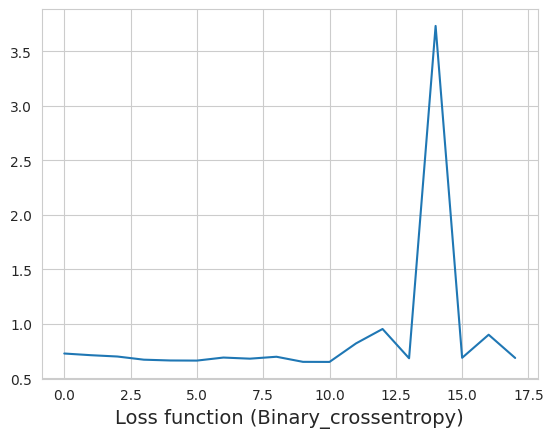

In [142]:
plt.plot(history.history['loss'])
plt.xlabel('Loss function (Binary_crossentropy)',size=14)
plt.show()

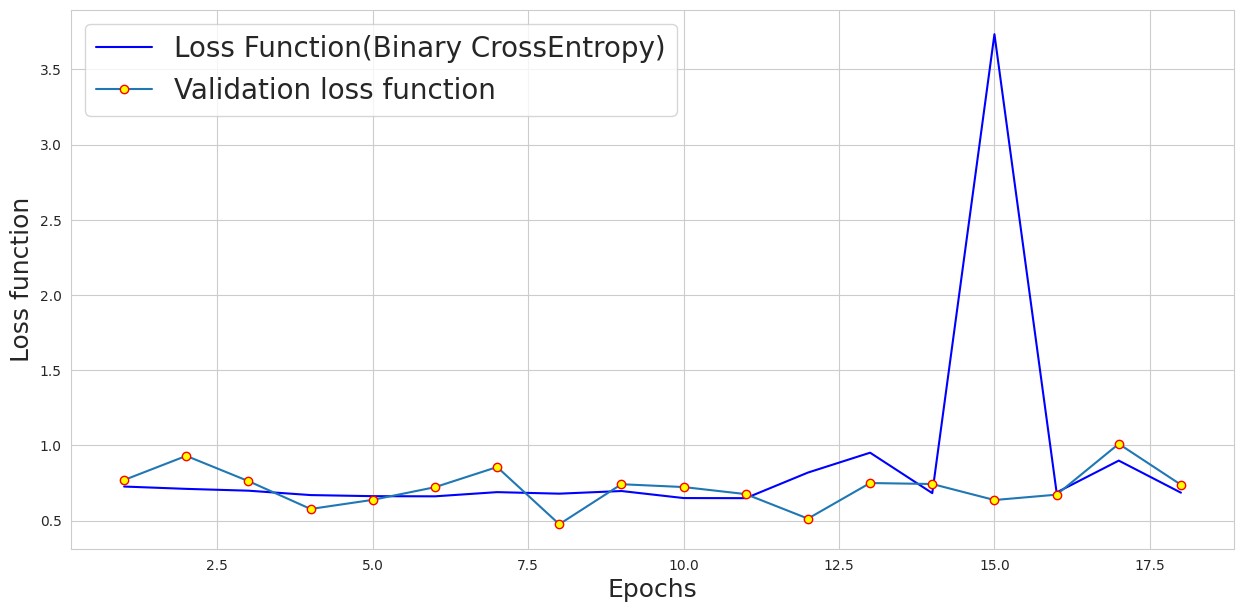

In [143]:
# more detailed loss function grapgh
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(num=1,figsize=(15,7))
plt.plot(epochs, loss, 'b', label='Loss Function(Binary CrossEntropy)')
plt.plot(epochs, val_loss, marker='o',markeredgecolor='red',markerfacecolor='yellow', label='Validation loss function')

plt.xlabel('Epochs',size=18)
plt.ylabel('Loss function', size=18)
plt.legend()
plt.show()

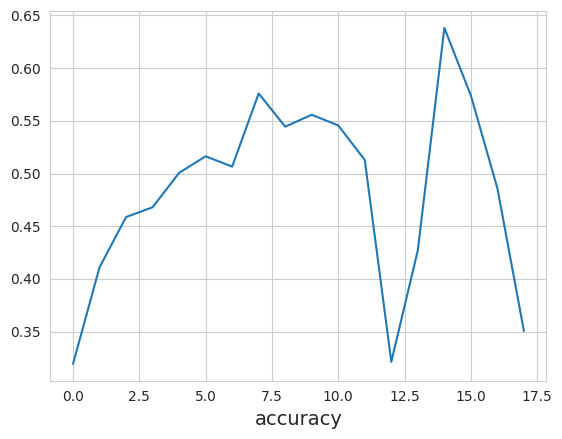

In [144]:
plt.plot(history.history['accuracy'])
plt.xlabel('accuracy',size=14)
plt.show()

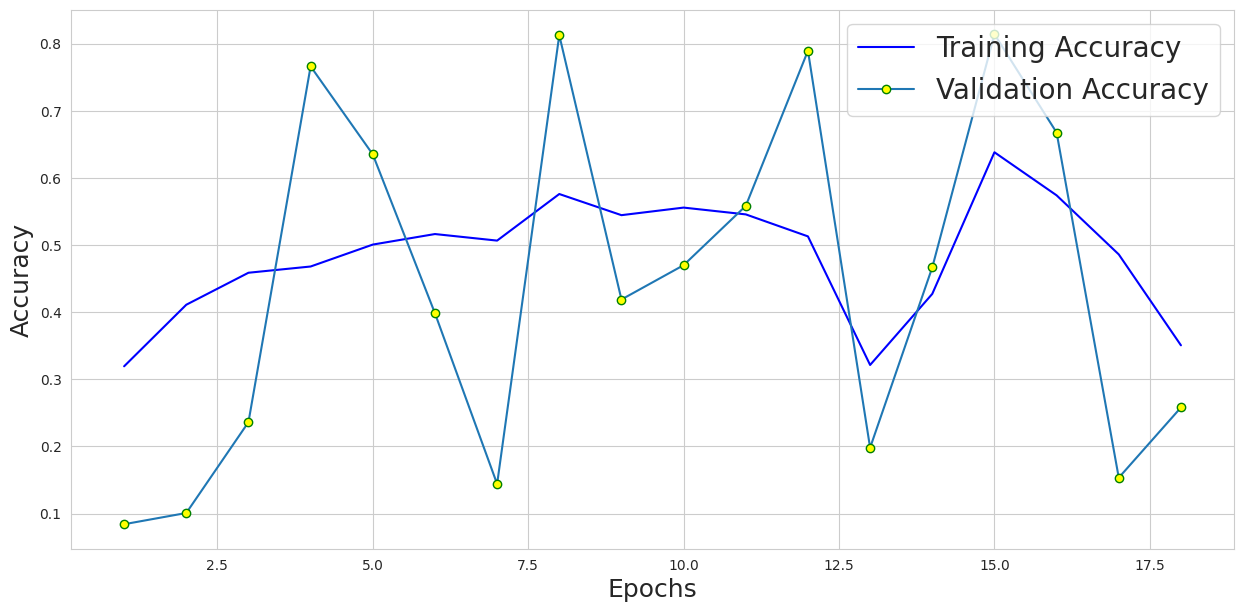

In [145]:
# more detailed Accuracy
history_dict = history.history
Accuracy_values = history_dict['accuracy'][:]
val_Accuracy_values = history_dict['val_accuracy']
epochs = range(1, len(Accuracy_values) + 1)
plt.figure(num=1,figsize=(15,7))
plt.plot(epochs, Accuracy_values, 'b', label='Training Accuracy')
plt.plot(epochs, val_Accuracy_values, marker='o',markeredgecolor='green',markerfacecolor='yellow', label='Validation Accuracy')

plt.xlabel('Epochs',size=18)
plt.ylabel('Accuracy', size=18)
plt.legend()
plt.show()

In [146]:
pred = LSTM_saved_best_model(X_test)

In [147]:
print(pred)

tf.Tensor(
[[0.19590789]
 [0.21534117]
 [0.22355686]
 ...
 [0.75838965]
 [0.7991277 ]
 [0.7553298 ]], shape=(1195, 1), dtype=float32)


In [148]:
import random
pred = LSTM_saved_best_model.predict(X_test)
n_rec = random.randint(0,X_test.shape[0])
print(n_rec)
print("Predicted Probability:",pred[n_rec],", right answer:",y_test[n_rec])

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
507
Predicted Probability: [0.17068326] , right answer: [0.]


In [149]:
pred

array([[0.19590789],
       [0.21534123],
       [0.2235569 ],
       ...,
       [0.75838965],
       [0.7991277 ],
       [0.75532985]], dtype=float32)

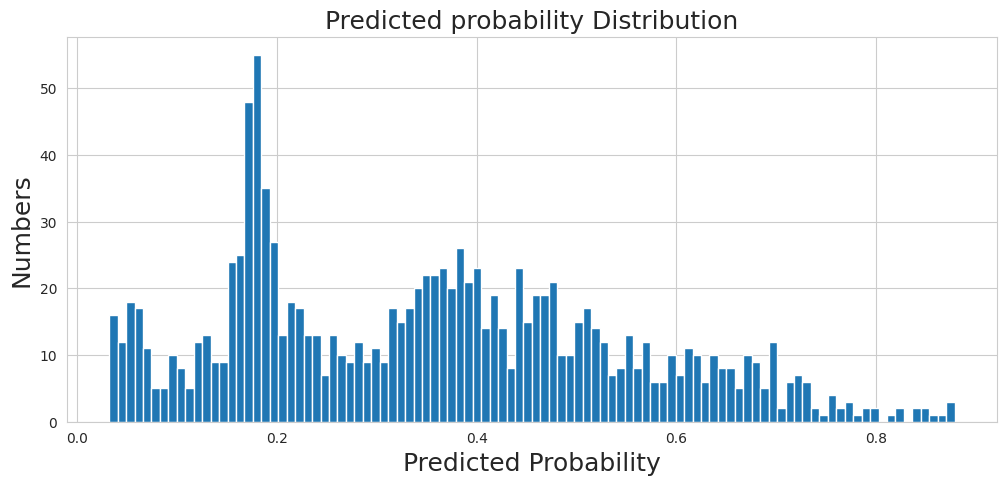

In [150]:
plt.figure(num=1,figsize=(12,5))
plt.hist(pred,bins=100)
plt.title('Predicted probability Distribution',size=18)
plt.xlabel('Predicted Probability',size=18)
plt.ylabel('Numbers',size=18)
plt.show()

In [151]:
from sklearn.metrics import classification_report

In [152]:
pred_binary = np.round(pred)

In [153]:
error_metrics_report = classification_report(y_test,pred_binary)
print(error_metrics_report)

              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82      1046
         1.0       0.13      0.25      0.17       149

    accuracy                           0.71      1195
   macro avg       0.51      0.51      0.50      1195
weighted avg       0.79      0.71      0.74      1195



In [154]:
pip install keras_tuner

In [155]:
from keras_tuner import RandomSearch
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from keras.optimizers import AdamW

In [156]:
timesteps=50
features=18

In [157]:
def build_model(hp):
  model = Sequential()
  model.add(LSTM(units=hp.Int('units',min_value=20,max_value=100,step=20),
                 return_sequences=True,input_shape=(timesteps, features)))
  model.add(Dropout(hp.Float('dropout',min_value=0.1,max_value=0.5,step=0.1)))
  model.add(LSTM(units=hp.Int('units_2',min_value=10,max_value=50,step=10)))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=AdamW(learning_rate=hp.Choice('learning_rate', values=[1e-2,1e-3,1e-4])),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [158]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='lstm_tuning')


Reloading Tuner from my_dir/lstm_tuning/tuner0.json


In [159]:
tuner.search(X_train,y_train,epochs=5,validation_split=0.2,shuffle=True,verbose=1,class_weight=class_weight_dict)

In [160]:
best_model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [161]:
print(best_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 100)             │          47,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30)                  │          15,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,351 (247.46 KB)

 Trainable params: 63,351 (247.46 KB)

 Non-trainable params: 0 (0.00 B)

None
